In [ ]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

### Optimization results

In [43]:
#df_ASAP =   pd.read_csv('./../ExpLogs/summ_c_ASAP.csv')
#df_NoV2G =  pd.read_csv('./../ExpLogs/summ_c_NoV2G.csv')
##df_Optim =  pd.read_csv('./../ExpLogs/summ_c_Optim.csv')
#df_Optim1 = pd.read_csv('./../ExpLogs/summ_nc2_Optim.csv')

df_l6_ASAP =   pd.read_csv('./../ExpLogs/summ_l6_ASAP.csv')
df_l6_NoV2G =  pd.read_csv('./../ExpLogs/summ_l6_NoV2G.csv')
#df_l6_Optim =  pd.read_csv('./../ExpLogs/summ_l6_Optim.csv')
df_l6_Optim =  pd.read_csv('./../ExpLogs/summ_l6_Optim2.csv')

df_f6_ASAP =   pd.read_csv('./../ExpLogs/summ_f6_ASAP.csv')
df_f6_NoV2G =  pd.read_csv('./../ExpLogs/summ_f6_NoV2G.csv')
df_f6_Optim =  pd.read_csv('./../ExpLogs/summ_f6_Optim.csv')

#df_optim_a = load_baseline_runs("summ_l6months_Optim_pred_noise", "a", 5)
#df_l6_Optim = df_optim_a[3]
#df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
#df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim1], axis=0).reset_index(drop=True)
df_res = pd.concat([df_l6_ASAP, df_l6_NoV2G, df_l6_Optim], axis=0).reset_index(drop=True)
df_f_res = pd.concat([df_f6_ASAP, df_f6_NoV2G, df_f6_Optim], axis=0).reset_index(drop=True)

dfs_61a = load_rl_gen("6month_sac_pred_noise_1a", 200, val = False)
dfs_62a = load_rl_gen("6month_sac_pred_noise_2a", 200, val = False)
dfs_63a = load_rl_gen("6month_sac_pred_noise_3a", 200, val = False)
dfs_64a = load_rl_gen("6month_sac_pred_noise_4a", 200, val = False)
dfs_65a = load_rl_gen("6month_sac_pred_noise_5a", 200, val = False)

dfs_6a_lol = [dfs_61a, dfs_62a, dfs_63a, dfs_64a, dfs_65a]


rl_final_transf_ep = []
rl_final_profit_ep = []
rl_final_payoff_ep = []
rl_final_client_ep = []
for dfs in dfs_6a_lol:
    rl_final_transf_ep.append(dfs[1]["transf"].iloc[-1])
    rl_final_profit_ep.append(dfs[1]["total"].iloc[-1])
    rl_final_payoff_ep.append(dfs[1]["payoff"].iloc[-1])
    rl_final_client_ep.append(dfs[1]["client"].iloc[-1])


display(df_f_res)
display(df_res)
print(rl_final_profit_ep, np.max(rl_final_profit_ep)- np.min(rl_final_profit_ep))

,name,transf,client,payoff,total,sessions
0,f6_ASAP,7071.999579,8371.850816,0.000000,1299.851237,df_elaad_preproc_f6months.csv
1,f6_NoV2G,4010.036216,8371.850816,0.000000,4361.814600,df_elaad_preproc_f6months.csv
2,f6_Optim,2251.240621,8371.850816,843.037718,5277.572477,df_elaad_preproc_f6months.csv


,name,transf,client,payoff,total,sessions
0,l6_ASAP,7865.479066,9929.38743,0.000000,2063.908365,df_elaad_preproc_l6months.csv
1,l6_NoV2G,3512.441727,9929.38743,0.000000,6416.945703,df_elaad_preproc_l6months.csv
2,l6_Optim2,1337.049714,9929.38743,891.224988,7701.112728,df_elaad_preproc_l6months.csv


[6249.238310452797, 6239.579163593799, 6209.089817962765, 6184.081167992918, 6269.69482053016] 85.61365253724125


In [44]:
for dfs in dfs_6a_lol:
    print(dfs[1]["total"].iloc[-1])

6249.238310452797
6239.579163593799
6209.089817962765
6184.081167992918
6269.69482053016


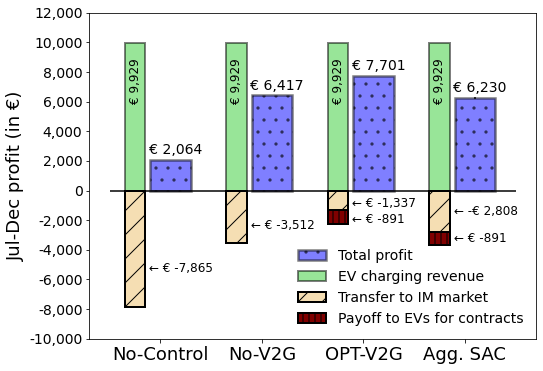

In [45]:
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(1,1,1)

barwidth = 0.2
fontsize = 14
x = np.arange(0, 3)
alpha1 = 0.5
alpha2 = 1
ax1.bar(x + 0.1,  df_res["total"],   color = "blue", edgecolor="black",     linewidth = 2.5, alpha=alpha1, width=barwidth*2,  hatch = ".", label="Total profit")
ax1.bar(x - 0.25, df_res["client"],  color = "limegreen", edgecolor="black", linewidth = 2, alpha = alpha1, width=barwidth, label="EV charging revenue")
ax1.bar(x - 0.25, -df_res["transf"], color = "wheat", edgecolor="black", linewidth = 2, alpha = alpha2, width=barwidth, hatch="/", label="Transfer to IM market")
ax1.bar(x - 0.25, -df_res["payoff"], color = "maroon", edgecolor="black", linewidth = 2, alpha= alpha2, width=barwidth, hatch = "||", label="Payoff to EVs for contracts", bottom = -df_res["transf"])

# RL
ax1.bar(3 + 0.1, np.mean(rl_final_profit_ep), yerr = np.max(rl_final_profit_ep) - np.min(rl_final_profit_ep),  color = "blue", edgecolor="black", linewidth = 2.5, alpha=alpha1, width=barwidth*2, hatch = ".")
ax1.bar(3 - 0.25, np.mean(rl_final_client_ep),  color = "limegreen", edgecolor="black", linewidth = 2, alpha = alpha1, width=barwidth)
ax1.bar(3 - 0.25, -np.mean(rl_final_transf_ep), color = "wheat", edgecolor="black", linewidth = 2, alpha = alpha2, width=barwidth, hatch="/")
ax1.bar(3 - 0.25, -np.mean(rl_final_payoff_ep), color = "maroon", edgecolor="black", linewidth = 2, alpha= alpha2, width=barwidth, hatch = "||", bottom = -np.mean(rl_final_transf_ep))

# Text
for (xi, row) in zip(x, df_res.itertuples()):
    # Profit
    ax1.text(xi + 0.15, row.total + 200, f"€ {row.total:,.0f}", ha="center", va="bottom", fontsize = fontsize-0)

    # EV Charging revenue
    ax1.text(xi-0.25, row.client - 1000, f"€ {row.client:,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)

    # Transfer to IM market
    ax1.text(xi-0.15, -4*row.transf/6, f" ← € -{row.transf:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

    # Payoff
    if row.payoff >0:
        ax1.text(xi-0.15, -row.transf-4*row.payoff/6, f" ← € -{row.payoff:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

ax1.text(3 + 0.15, np.mean(rl_final_profit_ep) + 200, f"€ {np.mean(rl_final_profit_ep):,.0f}", ha="center", va="bottom", fontsize = fontsize-0)
ax1.text(3 - 0.25, np.mean(rl_final_client_ep) - 1000, f"€ {np.mean(rl_final_client_ep):,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)
ax1.text(3 - 0.15, -np.mean(rl_final_transf_ep)/2, f" ← -€ {np.mean(rl_final_transf_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)
ax1.text(3 - 0.15, -np.mean(rl_final_transf_ep)-np.mean(rl_final_payoff_ep)/2, f" ← € -{np.mean(rl_final_payoff_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

ax1.hlines(0, -0.5, 3.5, colors='k', linestyles='solid', linewidth=1.5)

ax1.set_xticks(np.arange(0, 4))
ax1.set_xticklabels(["No-Control", "No-V2G", "OPT-V2G", "Agg. SAC"], fontsize = fontsize + 4)

#y_ticks = ax1.get_yticks()
y_ticks = np.arange(-10_000, 13_000, 2_000)
ax1.set_yticks(y_ticks)
y_ticklabels = ["{:,.0f}".format(y) for y in y_ticks]
ax1.set_yticklabels(y_ticklabels, fontsize = fontsize)
ax1.set_ylabel("Jul-Dec profit (in €)", fontsize = fontsize + 4)

ax1.legend(ncol = 1, fontsize = fontsize, loc = "lower right", frameon = False)


#fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/baselines_profit2.pdf", dpi = 1200, bbox_inches='tight')

In [46]:
df_summ_jan_ASAP  = pd.read_csv('./../ExpLogs/summ_jan_ASAP.csv')  
df_summ_jan_NoV2G = pd.read_csv('./../ExpLogs/summ_jan_NoV2G.csv')  
df_summ_jan_Optim = pd.read_csv('./../ExpLogs/summ_jan_Optim.csv')  
df_summ_feb_ASAP  = pd.read_csv('./../ExpLogs/summ_feb_ASAP.csv')  
df_summ_feb_NoV2G = pd.read_csv('./../ExpLogs/summ_feb_NoV2G.csv')  
df_summ_feb_Optim = pd.read_csv('./../ExpLogs/summ_feb_Optim.csv')  
df_summ_mar_ASAP  = pd.read_csv('./../ExpLogs/summ_mar_ASAP.csv')  
df_summ_mar_NoV2G = pd.read_csv('./../ExpLogs/summ_mar_NoV2G.csv')  
df_summ_mar_Optim = pd.read_csv('./../ExpLogs/summ_mar_Optim.csv')  
df_summ_apr_ASAP  = pd.read_csv('./../ExpLogs/summ_apr_ASAP.csv')  
df_summ_apr_NoV2G = pd.read_csv('./../ExpLogs/summ_apr_NoV2G.csv')  
df_summ_apr_Optim = pd.read_csv('./../ExpLogs/summ_apr_Optim.csv')  

df_jan_ASAP = pd.read_csv('./../ExpLogs/jan_ASAP.csv')
df_jan_NoV2G = pd.read_csv('./../ExpLogs/jan_NoV2G.csv')
df_jan_Optim = pd.read_csv('./../ExpLogs/jan_Optim.csv')
df_feb_ASAP = pd.read_csv('./../ExpLogs/feb_ASAP.csv')
df_feb_NoV2G = pd.read_csv('./../ExpLogs/feb_NoV2G.csv')
df_feb_Optim = pd.read_csv('./../ExpLogs/feb_Optim.csv')
df_mar_ASAP = pd.read_csv('./../ExpLogs/mar_ASAP.csv')
df_mar_NoV2G = pd.read_csv('./../ExpLogs/mar_NoV2G.csv')
df_mar_Optim = pd.read_csv('./../ExpLogs/mar_Optim.csv')
df_apr_ASAP = pd.read_csv('./../ExpLogs/apr_ASAP.csv')
df_apr_NoV2G = pd.read_csv('./../ExpLogs/apr_NoV2G.csv')
df_apr_Optim = pd.read_csv('./../ExpLogs/apr_Optim.csv')

df_may_ASAP = pd.read_csv('./../ExpLogs/may_ASAP.csv')
df_may_NoV2G = pd.read_csv('./../ExpLogs/may_NoV2G.csv')
df_may_Optim = pd.read_csv('./../ExpLogs/may_Optim.csv')

df_jun_ASAP = pd.read_csv('./../ExpLogs/jun_ASAP.csv')
df_jun_NoV2G = pd.read_csv('./../ExpLogs/jun_NoV2G.csv')
df_jun_Optim = pd.read_csv('./../ExpLogs/jun_Optim.csv')

df_jul_ASAP = pd.read_csv('./../ExpLogs/jul_ASAP.csv')
df_jul_NoV2G = pd.read_csv('./../ExpLogs/jul_NoV2G.csv')
df_jul_Optim = pd.read_csv('./../ExpLogs/jul_Optim.csv')

df_aug_ASAP = pd.read_csv('./../ExpLogs/aug_ASAP.csv')
df_aug_NoV2G = pd.read_csv('./../ExpLogs/aug_NoV2G.csv')
df_aug_Optim = pd.read_csv('./../ExpLogs/aug_Optim.csv')

df_sep_ASAP = pd.read_csv('./../ExpLogs/sep_ASAP.csv')
df_sep_NoV2G = pd.read_csv('./../ExpLogs/sep_NoV2G.csv')
df_sep_Optim = pd.read_csv('./../ExpLogs/sep_Optim.csv')

df_oct_ASAP = pd.read_csv('./../ExpLogs/oct_ASAP.csv')
df_oct_NoV2G = pd.read_csv('./../ExpLogs/oct_NoV2G.csv')
df_oct_Optim = pd.read_csv('./../ExpLogs/oct_Optim.csv')

df_nov_ASAP = pd.read_csv('./../ExpLogs/nov_ASAP.csv')
df_nov_NoV2G = pd.read_csv('./../ExpLogs/nov_NoV2G.csv')
df_nov_Optim = pd.read_csv('./../ExpLogs/nov_Optim.csv')

df_dec_ASAP = pd.read_csv('./../ExpLogs/dec_ASAP.csv')
df_dec_NoV2G = pd.read_csv('./../ExpLogs/dec_NoV2G.csv')
df_dec_Optim = pd.read_csv('./../ExpLogs/dec_Optim.csv')

df_summ_apr_Optim = pd.read_csv('./../ExpLogs/summ_apr_Optim.csv')
display(df_summ_apr_Optim.head())

,name,transf,client,payoff,total,sessions
0,apr_Optim,397.395422,1468.334912,148.508029,922.431461,df_elaad_preproc_apr.csv


In [47]:

df_ASAP =   pd.read_csv('./../ExpLogs/summ_nc_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_nc_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_nc_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_nc2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total,sessions
0,nc_ASAP,14937.478645,18301.238246,0.000000,3363.759602,df_elaad_preproc.csv
1,nc_NoV2G,7522.477944,18301.238246,0.000000,10778.760303,df_elaad_preproc.csv
2,nc_Optim,3595.171122,18301.238246,1733.129025,12972.938099,df_elaad_preproc.csv
3,nc2_Optim,3595.171122,18301.238246,1733.129025,12972.938099,df_elaad_preproc.csv


In [48]:
# Normalization dicts
optim_train = pd.read_csv("./../ExpLogs/train_Optim.csv")
optim_val = pd.read_csv("./../ExpLogs/val_Optim.csv")
optim_test = pd.read_csv("./../ExpLogs/test_Optim.csv")

nov2g_train = pd.read_csv("./../ExpLogs/train_NoV2G.csv")
nov2g_val =     pd.read_csv("./../ExpLogs/val_NoV2G.csv")
nov2g_test =   pd.read_csv("./../ExpLogs/test_NoV2G.csv")

asap_train = pd.read_csv("./../ExpLogs/train_ASAP.csv")
asap_val =     pd.read_csv("./../ExpLogs/val_ASAP.csv")
asap_test =   pd.read_csv("./../ExpLogs/test_ASAP.csv")


FileNotFoundError: [Errno 2] No such file or directory: './../ExpLogs/train_Optim.csv'

In [ ]:
optim_test2 = pd.read_csv("./../ExpLogs/c2_Optim.csv")
optim_test2["imbalance_bill"].sum()

FileNotFoundError: [Errno 2] No such file or directory: './../ExpLogs/c2_Optim.csv'

In [ ]:
optim_test2.head()

NameError: name 'optim_test2' is not defined

In [ ]:
optim_test["imbalance_bill"].sum()

NameError: name 'optim_test' is not defined

### RL Results

In [ ]:
norm_dict = {"train": optim_train["imbalance_bill"].sum(), "val": optim_val["imbalance_bill"].sum(), "test": optim_test["imbalance_bill"].sum()}
month_norm_dict = {"train": optim_train["imbalance_bill"][:768].sum(), "val": optim_val["imbalance_bill"][:768].sum(), "test": optim_test["imbalance_bill"][:768].sum()}
##df_train, df_val, df_test = load_rl_gen("sac_gen_a", 34, norm_dict = norm_dict)
#df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_c", 697)

# Baseline
#df_res = load_rl("month_sac_c", 50) 
df_res = load_rl("month_sac_IX_j", 200) 

NameError: name 'optim_train' is not defined

NameError: name 'asap_test' is not defined

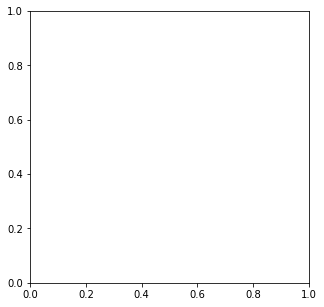

In [ ]:
fig1, (ax1) = plt.subplots(1,1, figsize=(5,5))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum(), x_max = 50)
ax1.plot(df_res["transf"])
ax1.set_ylabel("Imbalance Bill")

## 1 month train

In [ ]:
dfs_Gc = load_rl_gen("month_sac_gen_G_c", 300, val=False)
dfs_Gd = load_rl_gen("month_sac_gen_G_d", 300, val=False)
dfs_Ge = load_rl_gen("month_sac_gen_G_e", 300, val=False)

FileNotFoundError: [Errno 2] No such file or directory: './../ExpLogs/summ_train_month_sac_gen_G_c_0.csv'

In [ ]:
dfs_Gc[0].head()

NameError: name 'dfs_Gc' is not defined

NameError: name 'dfs_Ge' is not defined

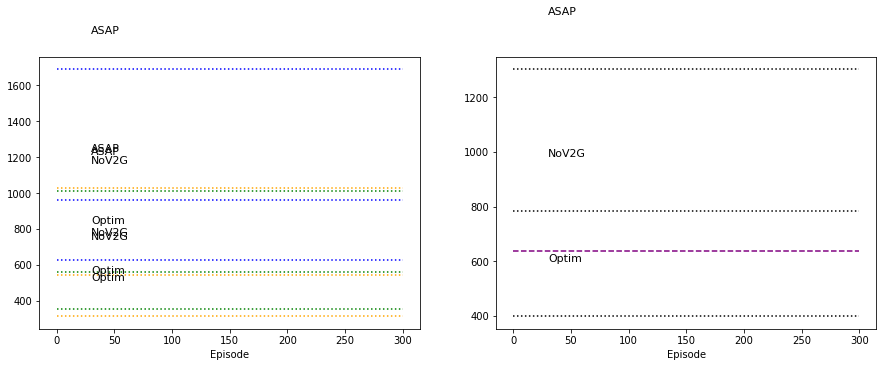

In [ ]:
fig1, (ax1, ax2) =  plt.subplots(1,2, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), color='blue', x_max = 300)
ax1 = draw_hlines(ax1, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), color='orange', x_max = 300)
ax1 = draw_hlines(ax1, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), color='green', x_max = 300)

ax2 = draw_hlines(ax2, df_apr_ASAP["imbalance_bill"].sum(), df_apr_NoV2G["imbalance_bill"].sum(), df_apr_Optim["imbalance_bill"].sum(), x_max = 300)
ax2.hlines(df_apr_NoV2G["imbalance_bill"].sum()-148, 0, 300, label="To win profitablilty", color="purple", ls="--")
plot_rl_gen_stoc(ax1, ax2, dfs_Ge)
ax2.set_ylim([0, 1800])
ax1.set_ylim([0, 1800])
ax1.set_title("Train on Jan, Feb, Mar")
ax2.set_title("Test on Apr")
ax1.set_ylabel("Transfer to Imbalance")
ax2.set_ylabel("Transfer to Imbalance")

ax1.legend()

NameError: name 'dfs_Ge' is not defined

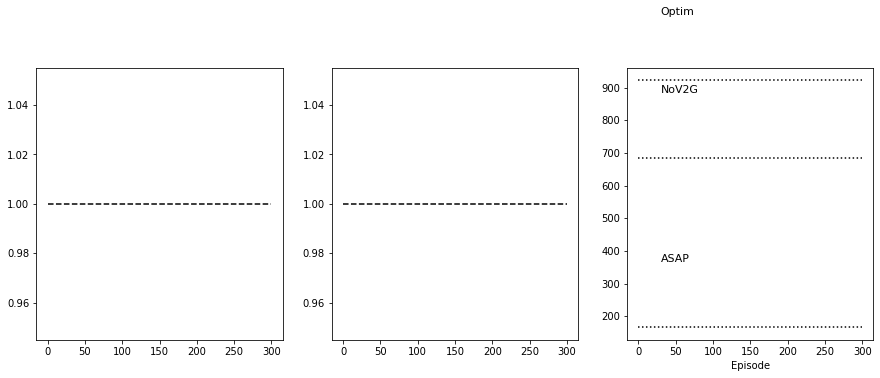

In [ ]:

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

#ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), color='blue', x_max = 200)
#ax1 = draw_hlines(ax1, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), color='orange', x_max = 200)
#ax1 = draw_hlines(ax1, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), color='green', x_max = 200)
norm_dict = {"jan": df_jan_Optim["imbalance_bill"].sum(), "feb": df_feb_Optim["imbalance_bill"].sum(), "mar": df_mar_Optim["imbalance_bill"].sum(), "apr": df_apr_Optim["imbalance_bill"].sum()}

ax3 = draw_hlines(ax3, df_summ_apr_ASAP["total"].sum(), df_summ_apr_NoV2G["total"].sum(), df_summ_apr_Optim["total"].sum(), x_max = 300)
ax1.hlines(1, 0, 300, color="k", ls="--")
ax2.hlines(1, 0, 300, color="k", ls="--")
plot_rl_gen_stoc(ax1, ax2, dfs_Ge, norm_dict=norm_dict, ax3=ax3)
ax1.set_ylim([0, 4])
ax2.set_ylim([0, 4])
ax3.set_ylim([0, 1000])
ax1.legend()
ax1.set_xlabel("Episode")
ax2.set_xlabel("Episode")
ax1.set_ylabel("Ratio to optimal transfer to market")
ax2.set_ylabel("Ratio to optimal transfer to market")
ax3.set_ylabel("Total profit")
ax1.set_title("Training on Jan, Feb, Mar")
ax2.set_title("Test on Apr")
ax3.set_title("Test on Apr")

fig1.tight_layout()


## 6+6 Month

In [ ]:
dfs_6a = load_rl_gen("6month_sac_gen_a", 200, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6b = load_rl_gen("6month_sac_gen_b", 200, val = False) # --batch-size 512 --learning-starts 12 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6c = load_rl_gen("6month_sac_gen_c", 200, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.03  --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6d = load_rl_gen("6month_sac_gen_d", 230, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.01 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6e = load_rl_gen("6month_sac_gen_e", 239, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6f = load_rl_gen("6month_sac_gen_f", 200, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6g = load_rl_gen("6month_sac_gen_g", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6h = load_rl_gen("6month_sac_gen_h", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6i = load_rl_gen("6month_sac_gen_i", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6j = load_rl_gen("6month_sac_gen_j", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_6k = load_rl_gen("6month_sac_gen_k", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_61l = load_rl_gen("6month_sac_gen_1l", 200, val = False) 
dfs_62l = load_rl_gen("6month_sac_gen_2l", 200, val = False) 
dfs_63l = load_rl_gen("6month_sac_gen_3l", 200, val = False) 
dfs_64l = load_rl_gen("6month_sac_gen_4l", 200, val = False) 
dfs_65l = load_rl_gen("6month_sac_gen_5l", 200, val = False) 

dfs_61a = load_rl_gen("6month_sac_pred_noise_1a", 200, val = False)
dfs_62a = load_rl_gen("6month_sac_pred_noise_2a", 200, val = False)
dfs_63a = load_rl_gen("6month_sac_pred_noise_3a", 200, val = False)
dfs_64a = load_rl_gen("6month_sac_pred_noise_4a", 200, val = False)
dfs_65a = load_rl_gen("6month_sac_pred_noise_5a", 200, val = False)



FileNotFoundError: [Errno 2] No such file or directory: './../ExpLogs/summ_train_6month_sac_gen_a_0.csv'

NameError: name 'dfs_61l' is not defined

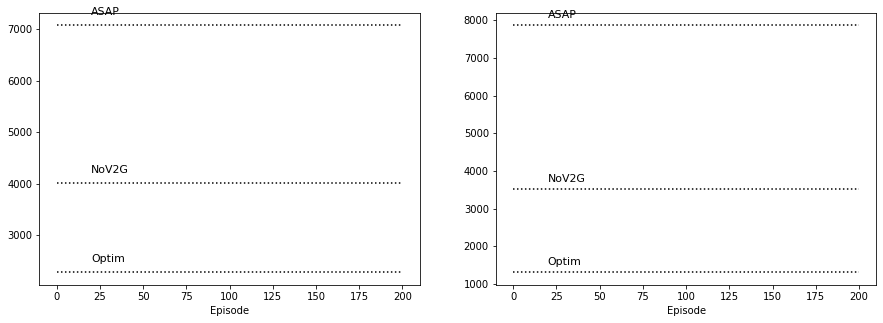

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Jan + Feb + Mar + Apr + May + Jun
train_asap = df_jan_ASAP["imbalance_bill"].sum() + df_feb_ASAP["imbalance_bill"].sum() + df_mar_ASAP["imbalance_bill"].sum() + df_apr_ASAP["imbalance_bill"].sum() + df_may_ASAP["imbalance_bill"].sum() + df_jun_ASAP["imbalance_bill"].sum()
train_nov2g = df_jan_NoV2G["imbalance_bill"].sum() + df_feb_NoV2G["imbalance_bill"].sum() + df_mar_NoV2G["imbalance_bill"].sum() + df_apr_NoV2G["imbalance_bill"].sum() + df_may_NoV2G["imbalance_bill"].sum() + df_jun_NoV2G["imbalance_bill"].sum()
train_optim = df_jan_Optim["imbalance_bill"].sum() + df_feb_Optim["imbalance_bill"].sum() + df_mar_Optim["imbalance_bill"].sum() + df_apr_Optim["imbalance_bill"].sum() + df_may_Optim["imbalance_bill"].sum() + df_jun_Optim["imbalance_bill"].sum()
train_optim_payoff = df_jan_Optim["payoff"].sum() + df_feb_Optim["payoff"].sum() + df_mar_Optim["payoff"].sum() + df_apr_Optim["payoff"].sum() + df_may_Optim["payoff"].sum() + df_jun_Optim["payoff"].sum()

#ax1.hlines(train_nov2g - train_optim_payoff, 0, 200, label="To win profitablilty", color="purple", ls="--") 

# Jul + Aug + Sep + Oct + Nov + Dec
test_asap = df_jul_ASAP["imbalance_bill"].sum() + df_aug_ASAP["imbalance_bill"].sum() + df_sep_ASAP["imbalance_bill"].sum() + df_oct_ASAP["imbalance_bill"].sum() + df_nov_ASAP["imbalance_bill"].sum() + df_dec_ASAP["imbalance_bill"].sum()
test_nov2g = df_jul_NoV2G["imbalance_bill"].sum() + df_aug_NoV2G["imbalance_bill"].sum() + df_sep_NoV2G["imbalance_bill"].sum() + df_oct_NoV2G["imbalance_bill"].sum() + df_nov_NoV2G["imbalance_bill"].sum() + df_dec_NoV2G["imbalance_bill"].sum()
test_optim = df_jul_Optim["imbalance_bill"].sum() + df_aug_Optim["imbalance_bill"].sum() + df_sep_Optim["imbalance_bill"].sum() + df_oct_Optim["imbalance_bill"].sum() + df_nov_Optim["imbalance_bill"].sum() + df_dec_Optim["imbalance_bill"].sum()
test_optim_payoff = df_jul_Optim["payoff"].sum() + df_aug_Optim["payoff"].sum() + df_sep_Optim["payoff"].sum() + df_oct_Optim["payoff"].sum() + df_nov_Optim["payoff"].sum() + df_dec_Optim["payoff"].sum()

#ax2.hlines(test_nov2g - test_optim_payoff, 0, 300, label="To win profitablilty", color="purple", ls="--")

ax1=draw_hlines(ax1, train_asap, train_nov2g, train_optim, x_max = 200)
ax2=draw_hlines(ax2, test_asap, test_nov2g, test_optim, x_max = 200)


#plot_rl_gen(ax1, ax2, None, dfs_6a[0], None, dfs_6a[1], label="dfs_6a", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6b[0], None, dfs_6b[1], label="dfs_6b", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6c[0], None, dfs_6c[1], label="dfs_6c", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6d[0], None, dfs_6d[1], label="dfs_6d", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6e[0], None, dfs_6e[1], label="dfs_6e", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6f[0], None, dfs_6f[1], label="dfs_6f", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6g[0], None, dfs_6g[1], label="dfs_6g", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6h[0], None, dfs_6h[1], label="dfs_6h", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6i[0], None, dfs_6i[1], label="dfs_6i", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6j[0], None, dfs_6j[1], label="dfs_6j", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_6k[0], None, dfs_6k[1], label="dfs_6k", val=False)
plot_rl_gen(ax1, ax2, None, dfs_61l[0], None, dfs_61l[1], label="dfs_61l", val=False)
plot_rl_gen(ax1, ax2, None, dfs_62l[0], None, dfs_62l[1], label="dfs_62l", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_63l[0], None, dfs_63l[1], label="dfs_63l", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_64l[0], None, dfs_64l[1], label="dfs_64l", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_65l[0], None, dfs_65l[1], label="dfs_65l", val=False)

#plot_rl_gen(ax1, ax2, None, dfs_61a[0], None, dfs_61a[1], label="dfs_61a", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_62a[0], None, dfs_62a[1], label="dfs_62a", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_63a[0], None, dfs_63a[1], label="dfs_63a", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_64a[0], None, dfs_64a[1], label="dfs_64a", val=False)
#plot_rl_gen(ax1, ax2, None, dfs_65a[0], None, dfs_65a[1], label="dfs_65a", val=False)


ax1.set_title("Train on Jan, Feb, Mar, Apr, May, Jun")
ax2.set_title("Test on Jul, Aug, Sep, Oct, Nov, Dec")
ax1.legend()

ax1.set_ylabel("Transfer to Imbalance")
ax1.set_ylim([0, 9000])
ax2.set_ylim([0, 9000])
print(dfs_62l[0]["transf"].tail())

## Clean plot

In [ ]:
dfs_61a[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      200 non-null    object 
 1   transf    200 non-null    float64
 2   client    200 non-null    float64
 3   payoff    200 non-null    float64
 4   total     200 non-null    float64
 5   sessions  200 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
train_optim + test_optim

3584.127722680683

In [ ]:
def draw_baseLine(ax, val, name, offset = 100, xoffset = 0.05, fontsize = 16, x_lims = None, ha = "left"):
    if x_lims is None:
        x_lims = ax.get_xlim()
    ax.hlines(val, x_lims[0], x_lims[1], color = "grey", ls = "--")
    ax.text(x_lims[1]*xoffset,  val+offset, name, fontsize = fontsize - 2, ha = ha)
    return ax

def draw_ticks(ax, fontsize= 16, x_do = True, x_ticks = None, y_ticks = None):
    if x_do:
        if x_ticks is None: x_ticks = ax.get_xticks()[1:-1]
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f"{x:,.0f}" for x in x_ticks], fontsize = fontsize - 2)

    if y_ticks is None: y_ticks = ax.get_yticks()
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{y:,.0f}" for y in y_ticks], fontsize = fontsize - 2)

    return ax


def get_toleranceBound(df_lol): # lol: list of lists
    train_transf = [x[0]["transf"] for x in df_lol]
    test_transf = [x[1]["transf"] for x in df_lol]
    test_total = [x[1]["total"] for x in df_lol]

    df_min_train = np.amin(train_transf, axis=0)
    df_max_train = np.amax(train_transf, axis=0)

    df_min_test = np.amin(test_transf, axis=0)
    df_max_test = np.amax(test_transf, axis=0)

    df_min_profit = np.amin(test_total, axis=0)
    df_max_prifit = np.amax(test_total, axis=0)

    return (df_min_train, df_max_train), (df_min_test, df_max_test), (df_min_profit, df_max_prifit)


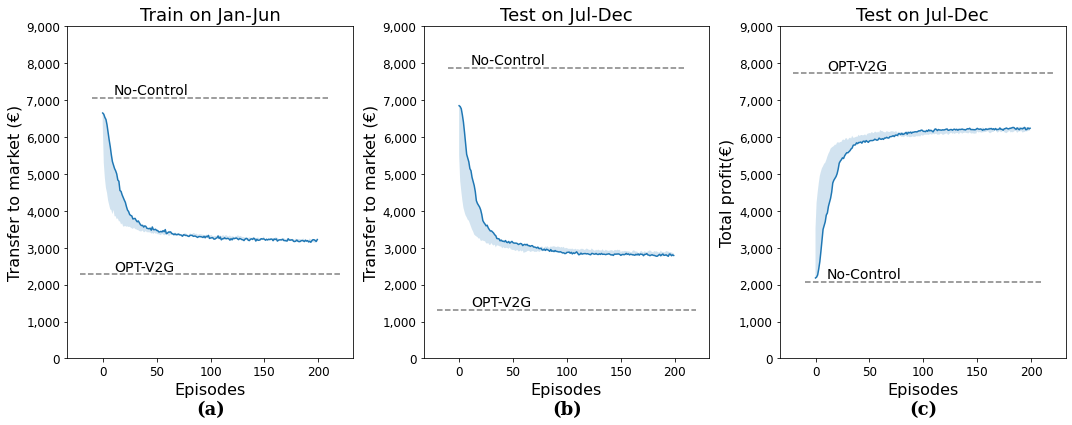

In [ ]:

fig1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))

fontsize = 16

# Jan + Feb + Mar + Apr + May + Jun
train_asap = df_jan_ASAP["imbalance_bill"].sum() + df_feb_ASAP["imbalance_bill"].sum() + df_mar_ASAP["imbalance_bill"].sum() + df_apr_ASAP["imbalance_bill"].sum() + df_may_ASAP["imbalance_bill"].sum() + df_jun_ASAP["imbalance_bill"].sum()
train_nov2g = df_jan_NoV2G["imbalance_bill"].sum() + df_feb_NoV2G["imbalance_bill"].sum() + df_mar_NoV2G["imbalance_bill"].sum() + df_apr_NoV2G["imbalance_bill"].sum() + df_may_NoV2G["imbalance_bill"].sum() + df_jun_NoV2G["imbalance_bill"].sum()
train_optim = df_jan_Optim["imbalance_bill"].sum() + df_feb_Optim["imbalance_bill"].sum() + df_mar_Optim["imbalance_bill"].sum() + df_apr_Optim["imbalance_bill"].sum() + df_may_Optim["imbalance_bill"].sum() + df_jun_Optim["imbalance_bill"].sum()
train_optim_payoff = df_jan_Optim["payoff"].sum() + df_feb_Optim["payoff"].sum() + df_mar_Optim["payoff"].sum() + df_apr_Optim["payoff"].sum() + df_may_Optim["payoff"].sum() + df_jun_Optim["payoff"].sum()

#ax1.hlines(train_nov2g - train_optim_payoff, 0, 200, label="To win profitablilty", color="purple", ls="--") 

# Jul + Aug + Sep + Oct + Nov + Dec
test_asap = df_jul_ASAP["imbalance_bill"].sum() + df_aug_ASAP["imbalance_bill"].sum() + df_sep_ASAP["imbalance_bill"].sum() + df_oct_ASAP["imbalance_bill"].sum() + df_nov_ASAP["imbalance_bill"].sum() + df_dec_ASAP["imbalance_bill"].sum()
test_nov2g = df_jul_NoV2G["imbalance_bill"].sum() + df_aug_NoV2G["imbalance_bill"].sum() + df_sep_NoV2G["imbalance_bill"].sum() + df_oct_NoV2G["imbalance_bill"].sum() + df_nov_NoV2G["imbalance_bill"].sum() + df_dec_NoV2G["imbalance_bill"].sum()
test_optim = df_jul_Optim["imbalance_bill"].sum() + df_aug_Optim["imbalance_bill"].sum() + df_sep_Optim["imbalance_bill"].sum() + df_oct_Optim["imbalance_bill"].sum() + df_nov_Optim["imbalance_bill"].sum() + df_dec_Optim["imbalance_bill"].sum()
test_optim_payoff = df_jul_Optim["payoff"].sum() + df_aug_Optim["payoff"].sum() + df_sep_Optim["payoff"].sum() + df_oct_Optim["payoff"].sum() + df_nov_Optim["payoff"].sum() + df_dec_Optim["payoff"].sum()


# DO it with client bill instead of imbalance bill
test_client_asap = df_jul_ASAP["client_bill"].sum() + df_aug_ASAP["client_bill"].sum() + df_sep_ASAP["client_bill"].sum() + df_oct_ASAP["client_bill"].sum() + df_nov_ASAP["client_bill"].sum() + df_dec_ASAP["client_bill"].sum()
test_client_nov2g = df_jul_NoV2G["client_bill"].sum() + df_aug_NoV2G["client_bill"].sum() + df_sep_NoV2G["client_bill"].sum() + df_oct_NoV2G["client_bill"].sum() + df_nov_NoV2G["client_bill"].sum() + df_dec_NoV2G["client_bill"].sum()
test_client_optim = df_jul_Optim["client_bill"].sum() + df_aug_Optim["client_bill"].sum() + df_sep_Optim["client_bill"].sum() + df_oct_Optim["client_bill"].sum() + df_nov_Optim["client_bill"].sum() + df_dec_Optim["client_bill"].sum()

test_profit_asap = test_client_asap - test_asap
test_profit_nov2g = test_client_nov2g - test_nov2g
test_profit_optim = test_client_optim - test_optim - test_optim_payoff


dfs_6as = [dfs_61a, dfs_62a, dfs_63a, dfs_64a, dfs_65a]
train_bounds, test_bounds, profit_bounds = get_toleranceBound(dfs_6as)


ax1.fill_between(np.arange(0, 200), train_bounds[0], train_bounds[1], alpha=0.2)
ax2.fill_between(np.arange(0, 200), test_bounds[0], test_bounds[1], alpha=0.2)
ax3.fill_between(np.arange(0, 200), profit_bounds[0], profit_bounds[1], alpha=0.2)

ax1.plot(dfs_62a[0]["transf"])
ax2.plot(dfs_62a[1]["transf"])
ax3.plot(dfs_62a[1]["total"])


x_lims1 = ax1.get_xlim()
x_lims2 = ax2.get_xlim()
x_lims3 = ax3.get_xlim()

draw_baseLine(ax1, train_asap, "No-Control", offset = 100, fontsize = fontsize)
draw_baseLine(ax1, train_optim, "OPT-V2G", offset = 100, fontsize = fontsize)

draw_baseLine(ax2, test_asap, "No-Control", offset = 100, fontsize = fontsize)
draw_baseLine(ax2, test_optim, "OPT-V2G", offset = 100, fontsize = fontsize)

draw_baseLine(ax3, test_profit_asap, "No-Control", offset = 100, fontsize = fontsize)
draw_baseLine(ax3, test_profit_optim, "OPT-V2G", offset = 100, fontsize = fontsize)

ax1.set_title("Train on Jan-Jun", fontsize = fontsize + 2)
ax2.set_title("Test on Jul-Dec",  fontsize = fontsize + 2)
ax3.set_title("Test on Jul-Dec",  fontsize = fontsize + 2)

ax1.set_ylabel("Transfer to market (€)", fontsize = fontsize)
ax2.set_ylabel("Transfer to market (€)", fontsize = fontsize)
ax3.set_ylabel("Total profit(€)", fontsize = fontsize)

ax1.set_xlabel("Episodes", fontsize = fontsize)
ax2.set_xlabel("Episodes", fontsize = fontsize)
ax3.set_xlabel("Episodes", fontsize = fontsize)

ax1.set_ylim([0, 9000])
ax2.set_ylim([0, 9000])
ax3.set_ylim([0, 9000])

draw_ticks(ax1, fontsize=fontsize-2)
draw_ticks(ax2, fontsize=fontsize-2)
draw_ticks(ax3, fontsize=fontsize-2)

ax1.text(100, -1500, "(a)", fontsize = fontsize + 2, fontweight = "bold", family = "serif", ha = "center")
ax2.text(100, -1500, "(b)", fontsize = fontsize + 2, fontweight = "bold", family = "serif", ha = "center")
ax3.text(100, -1500, "(c)", fontsize = fontsize + 2, fontweight = "bold", family = "serif", ha = "center")

fig1.tight_layout()

#fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/rl_gen.pdf", dpi = 1200, bbox_inches='tight')

## Noisy prediction

In [ ]:
def load_runs(name, suffix, runs, episodes, val = False):
    names = [f"{name}_{i+1}{suffix}" for i in range(runs)]
    df_lol = []
    for i in range(runs):
        df_lol.append(load_rl_gen(names[i], episodes, val = val))
    return df_lol

def load_baseline_runs(name, suffix, runs, dir = "../ExpLogs/"):
    names = [f"{name}_{i+1}{suffix}.csv" for i in range(runs)]
    df_blns = []

    for i in range(runs):
        df_blns.append(pd.read_csv(dir + names[i]))

    return df_blns


In [ ]:
df_nov2g_a = load_baseline_runs("summ_l6months_NoV2G_pred_noise", "a", 5)
df_nov2g_b = load_baseline_runs("summ_l6months_NoV2G_pred_noise", "b", 5)
df_nov2g_c = load_baseline_runs("summ_l6months_NoV2G_pred_noise", "c", 5)
df_nov2g_d = load_baseline_runs("summ_l6months_NoV2G_pred_noise", "d", 5)
df_nov2g_e = load_baseline_runs("summ_l6months_NoV2G_pred_noise", "e", 5)

df_optim_a = load_baseline_runs("summ_l6months_Optim_pred_noise", "a", 5)
df_optim_b = load_baseline_runs("summ_l6months_Optim_pred_noise", "b", 5)
df_optim_c = load_baseline_runs("summ_l6months_Optim_pred_noise", "c", 5)
df_optim_d = load_baseline_runs("summ_l6months_Optim_pred_noise", "d", 5)
df_optim_e = load_baseline_runs("summ_l6months_Optim_pred_noise", "e", 5)

In [ ]:
df_optim_a[3]

,name,transf,client,payoff,total,sessions
0,l6months_Optim_pred_noise_4a,1337.049714,9929.38743,891.224988,7701.112728,df_elaad_preproc_l6months.csv


In [ ]:
dfa_lol = load_runs("6month_sac_pred_noise", "a", 5, 200, val = False)
dfb_lol = load_runs("6month_sac_pred_noise", "b", 5, 200, val = False)
dfc_lol = load_runs("6month_sac_pred_noise", "c", 5, 200, val = False)
dfd_lol = load_runs("6month_sac_pred_noise", "d", 5, 200, val = False)
dfe_lol = load_runs("6month_sac_pred_noise", "e", 5, 200, val = False)

df_lols = [dfa_lol, dfb_lol, dfc_lol, dfd_lol, dfe_lol]
#dfs_6j = load_rl_gen("6month_sac_gen_j", 300, val = False) 

In [ ]:
import pickle
#df_lol_og_res = [dfa_lol, dfb_lol, dfc_lol, dfd_lol, dfe_lol]
## Save df_lol_og_res as pickle
#with open("res_rl_noisy_pred", "wb") as f:
#   pickle.dump(df_lol_og_res, f)

# Load Pickle df_lol_og_res
df_lol_og_res = pickle.load(open("res_rl_noisy_pred", "rb"))

dfa_lol = df_lol_og_res[0]
dfb_lol = df_lol_og_res[1]
dfc_lol = df_lol_og_res[2]
dfd_lol = df_lol_og_res[3]
dfe_lol = df_lol_og_res[4]

df_lols = [dfa_lol, dfb_lol, dfc_lol, dfd_lol, dfe_lol]

In [ ]:
print("Train")
for i in range(5):
    print(df_lols[0][i][0]["transf"].iloc[-1], train_optim)
    print(df_lols[0][i][0]["transf"].iloc[-1]/train_optim)

print("\nTest")

for i in range(5):
    print(i)
    for j in range(5):
        print(df_lols[i][j][1]["transf"].iloc[-1], test_optim)
        #print(df_lols[i][j][1]["transf"].iloc[-1]/test_optim)
    #ax1.plot(df_lols[i][1][1]["transf"], lw = lw[i], label = r"$\sigma$" + f" = {noise_level[i]:.2f}", zorder = zo[i], ls = ls[i])

Train
3200.582424213864 2277.2803882190346
1.405440647875998
3199.9285297304014 2277.2803882190346
1.4051535095478211
3284.238164774584 2277.2803882190346
1.4421755800316924
3288.702394991205 2277.2803882190346
1.444135914051041
3271.51694185564 2277.2803882190346
1.436589433071154

Test
0
2869.22185952482 1306.8473344616482
2835.8673160433173 1306.8473344616482
2897.013197995805 1306.8473344616482
2883.029657572552 1306.8473344616482
2817.514137829953 1306.8473344616482
1
3095.798169389199 1306.8473344616482
3021.9791000028 1306.8473344616482
3082.314515841643 1306.8473344616482
3060.168443325813 1306.8473344616482
3097.452736598188 1306.8473344616482
2
3521.3184429862977 1306.8473344616482
3573.759542778019 1306.8473344616482
3572.785087391156 1306.8473344616482
3531.538343778746 1306.8473344616482
3481.7229220489507 1306.8473344616482
3
4438.507499104029 1306.8473344616482
4502.475575220757 1306.8473344616482
4467.2784447719205 1306.8473344616482
4607.967291047755 1306.8473344616482

[2869.22185952482, 2835.8673160433173, 2897.013197995805, 2883.029657572552, 2817.514137829953]


FileNotFoundError: [Errno 2] No such file or directory: '/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/noisy_pred_3.pdf'

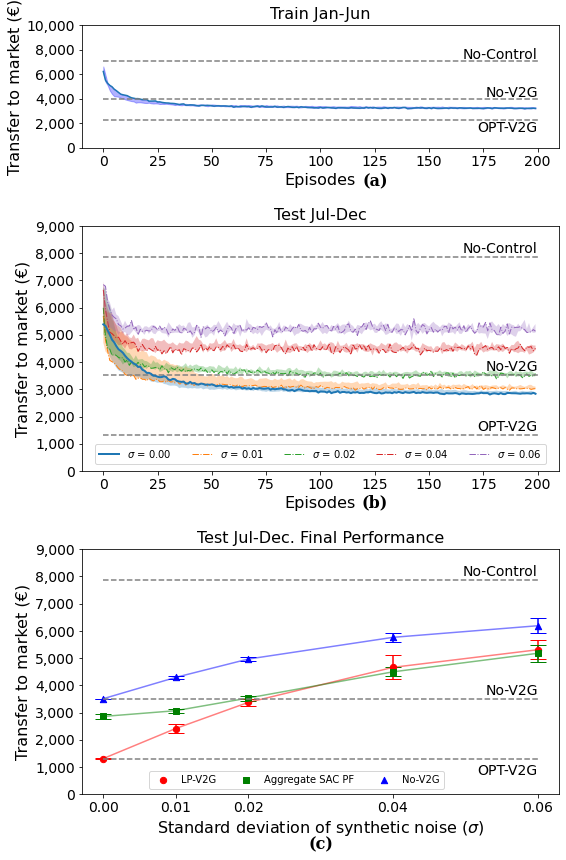

In [ ]:
fig1, (ax0,ax1, ax2) = plt.subplots(3, 1, figsize=(8,12), height_ratios = [1,2,2])

noises = 5
fontsize = 16

for i in range(len(df_lols)):
    train_bounds, test_bounds, profit_bounds = get_toleranceBound(df_lols[i])
    ax0.fill_between(np.arange(0, 200), train_bounds[0], train_bounds[1], color = "blue", alpha=0.3)
    ax0.plot(df_lols[0][1][0]["transf"])
    break

draw_baseLine(ax0, train_asap, "No-Control", xoffset = 1,  offset = 200, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax0, train_nov2g, "No-V2G",    xoffset = 1,  offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax0, train_optim, "OPT-V2G",   xoffset = 1,  offset = -1000, fontsize = fontsize, x_lims = (0, 200), ha = "right")

R2 = [1.000, 0.974, 0.897, 0.588, 0.075]
noise_level = [0.0, 0.01, 0.02, 0.04, 0.06]

df_lols = [dfa_lol, dfb_lol, dfc_lol, dfd_lol, dfe_lol]
lw = [2, 1, 1, 1, 1,]
zo = [400, 1, 1, 1, 1]
ls = ["-", "-.", "-.", "-.", "-."]

# ax1 
for i in range(noises):
    train_bounds, test_bounds, profit_bounds = get_toleranceBound(df_lols[i])
    ax1.fill_between(np.arange(0, 200), test_bounds[0], test_bounds[1], alpha=0.3)
    ax1.plot(df_lols[i][1][1]["transf"], lw = lw[i], label = r"$\sigma$" + f" = {noise_level[i]:.2f}", zorder = zo[i], ls = ls[i])


draw_baseLine(ax1, test_asap, "No-Control", xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax1, test_nov2g, "No-V2G",    xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax1, test_optim, "OPT-V2G",   xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")

# ax2
# Noise means
rl_noises_avg = []
rl_noises_max = []
rl_noises_min = []
for i, df_runs in enumerate(df_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df[1]["transf"].iloc[-1])
    
    if i==0: print(l_noise)
    rl_noises_avg.append(np.mean(l_noise))
    rl_noises_max.append(np.max(l_noise))  
    rl_noises_min.append(np.min(l_noise))

rl_noises_max = np.array(rl_noises_max)
rl_noises_min = np.array(rl_noises_min)

df_optim_lols = [df_optim_a, df_optim_b, df_optim_c, df_optim_d, df_optim_e]
df_nov2g_lols = [df_nov2g_a, df_nov2g_b, df_nov2g_c, df_nov2g_d, df_nov2g_e]

optim_noises_avg = []
optim_noises_max = []
optim_noises_min = []
for i,  df_runs in enumerate(df_optim_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df["transf"])
    optim_noises_avg.append(np.mean(l_noise))
    optim_noises_max.append(np.max(l_noise))  
    optim_noises_min.append(np.min(l_noise))

optim_noises_max = np.array(optim_noises_max)
optim_noises_min = np.array(optim_noises_min)

nov2g_noises_avg = []
nov2g_noises_max = []
nov2g_noises_min = []
for i,  df_runs in enumerate(df_nov2g_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df["transf"])
    nov2g_noises_avg.append(np.mean(l_noise))
    nov2g_noises_max.append(np.max(l_noise))  
    nov2g_noises_min.append(np.min(l_noise))

nov2g_noises_max = np.array(nov2g_noises_max)
nov2g_noises_min = np.array(nov2g_noises_min)

ax2.plot(noise_level, optim_noises_avg, color = "red", alpha = 0.5)
ax2.errorbar(noise_level, optim_noises_avg, yerr=optim_noises_max - optim_noises_min, fmt='o', markersize = 0, color="red", capsize=8, zorder=-1000)
ax2.scatter(noise_level, optim_noises_avg, label="LP-V2G", color="red", marker="o", s = 40)

ax2.plot(noise_level, rl_noises_avg, color = "green", alpha = 0.5)
ax2.errorbar(noise_level, rl_noises_avg, yerr=rl_noises_max - rl_noises_min, fmt='o', markersize = 0, color="green", capsize=8, zorder=-1000)
ax2.scatter(noise_level, rl_noises_avg, label="Aggregate SAC PF", color="green", marker="s", s=40)

ax2.plot(noise_level, nov2g_noises_avg, color = "blue", alpha = 0.5)
ax2.errorbar(noise_level, nov2g_noises_avg, yerr=nov2g_noises_max - nov2g_noises_min, fmt='o', markersize = 0, color="blue", capsize=8, zorder=-1000)
ax2.scatter(noise_level, nov2g_noises_avg, label="No-V2G", color="blue", marker="^", s=40)

ax2.set_xticks(noise_level)
ax2.set_xticklabels([f"{x:.02f}" for x in noise_level], fontsize = fontsize - 2)

draw_baseLine(ax2, test_asap, "No-Control", xoffset = 1, offset = 150, x_lims = (0, 0.06), ha = "right", fontsize = fontsize)
draw_baseLine(ax2, test_nov2g, "No-V2G",    xoffset = 1, offset = 150, x_lims = (0, 0.06), ha = "right", fontsize = fontsize)
draw_baseLine(ax2, test_optim, "OPT-V2G",   xoffset = 1, offset = -600,x_lims = (0, 0.06), ha = "right",  fontsize = fontsize)

ax2.set_xlabel("Standard deviation of synthetic noise " + "($\sigma$)", fontsize = fontsize)


#x_ticks = ax2.get_xticks()[1:-1]
#ax2.set_xticks(x_ticks)
#ax2.set_xticklabels([f"{x:.02f}" for x in x_ticks], fontsize = fontsize - 2)

# Labels
ax0.set_title("Train Jan-Jun", fontsize = fontsize) 
ax1.set_title("Test Jul-Dec", fontsize = fontsize) 
ax2.set_title("Test Jul-Dec. Final Performance", fontsize = fontsize)
ax0.set_xlabel("Episodes", fontsize = fontsize)
ax0.set_ylim([0, 9000])
ax1.set_xlabel("Episodes", fontsize = fontsize)
ax1.set_ylim([0, 9000])
ax2.set_ylim([0, 9000])

ax1.legend(ncol = 5, bbox_to_anchor = (0.5, 0.07), loc = "center", fontsize = fontsize - 6, frameon = True)
ax2.legend(ncol = 3, bbox_to_anchor = (0.45, 0.06), loc="center", fontsize = fontsize -6, frameon = True)


draw_ticks(ax0, fontsize=fontsize)
draw_ticks(ax1, fontsize=fontsize)
draw_ticks(ax2, fontsize=fontsize, x_do = False)

ax0.set_ylabel("Transfer to market (€)", fontsize = fontsize)
ax1.set_ylabel("Transfer to market (€)", fontsize = fontsize)
ax2.set_ylabel("Transfer to market (€)", fontsize = fontsize)

ax0.text(125,  -3150, "(a)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")
ax1.text(125,  -1350, "(b)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")
ax2.text(0.03, -2000, "(c)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")

fig1.tight_layout(h_pad = 2)

fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/noisy_pred_3.pdf", dpi = 1200, bbox_inches='tight')

In [ ]:
train_bounds[1].min() / train_optim

1.4420477777774598

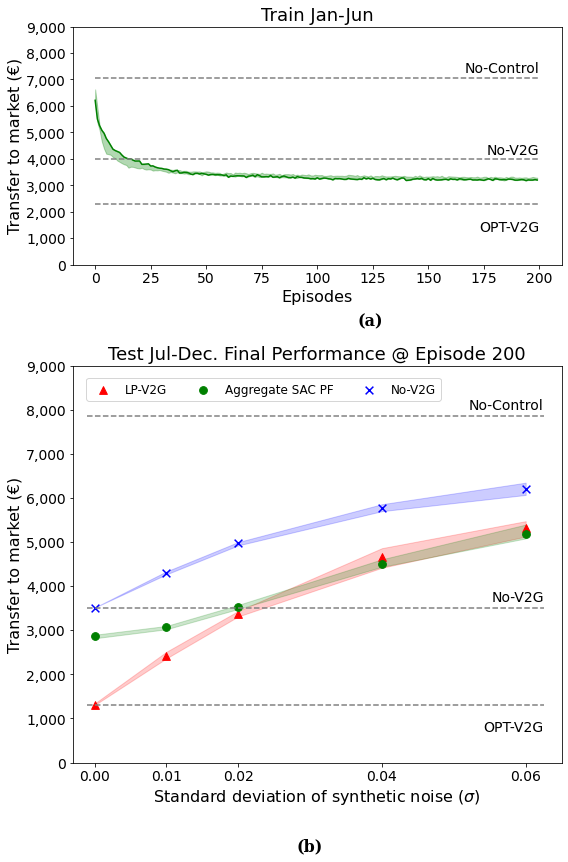

In [51]:

fig1, (ax0, ax2) = plt.subplots(2, 1, figsize=(8,12), height_ratios = [3,5])

noises = 5
fontsize = 16

df_lols = [dfa_lol, dfb_lol, dfc_lol, dfd_lol, dfe_lol]

for i in range(len(df_lols)):
    train_bounds, test_bounds, profit_bounds = get_toleranceBound(df_lols[i])
    ax0.fill_between(np.arange(0, 200), train_bounds[0], train_bounds[1], color = "green", alpha=0.3)
    ax0.plot(df_lols[0][1][0]["transf"], color= "green")
    break

draw_baseLine(ax0, train_asap, "No-Control", xoffset = 1,  offset = 200, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax0, train_nov2g, "No-V2G",    xoffset = 1,  offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
draw_baseLine(ax0, train_optim, "OPT-V2G",   xoffset = 1,  offset = -1000, fontsize = fontsize, x_lims = (0, 200), ha = "right")

R2 = [1.000, 0.974, 0.897, 0.588, 0.075]
noise_level = np.array([0.0, 0.01, 0.02, 0.04, 0.06])

lw = [2, 1, 1, 1, 1,]
zo = [400, 1, 1, 1, 1]
ls = ["-", "-.", "-.", "-.", "-."]

# ax1 
#for i in range(noises):
#    train_bounds, test_bounds, profit_bounds = get_toleranceBound(df_lols[i])
#    ax1.fill_between(np.arange(0, 200), test_bounds[0], test_bounds[1], alpha=0.3)
#    ax1.plot(df_lols[i][1][1]["transf"], lw = lw[i], label = r"$\sigma$" + f" = {noise_level[i]:.2f}", zorder = zo[i], ls = ls[i])
#
#
#draw_baseLine(ax1, test_asap, "No-Control", xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
#draw_baseLine(ax1, test_nov2g, "No-V2G",    xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")
#draw_baseLine(ax1, test_optim, "OPT-V2G",   xoffset = 1, offset = 150, fontsize = fontsize, x_lims = (0, 200), ha = "right")

#ax1.set_title("Test Jul-Dec", fontsize = fontsize) 
#ax1.set_xlabel("Episodes", fontsize = fontsize)
#ax1.set_ylim([0, 9000])
#ax1.legend(ncol = 5, bbox_to_anchor = (0.5, 0.07), loc = "center", fontsize = fontsize - 6, frameon = True)
#ax1.set_ylabel("Transfer to market (€)", fontsize = fontsize)
#ax1.text(125,  -1350, "(b)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")

# ax2
# Noise means
rl_noises_avg = []
rl_noises_max = []
rl_noises_min = []
d_noises_rl = {}
for i, df_runs in enumerate(df_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df[1]["transf"].iloc[-1])
    #d_noises_rl[i] = [x.values[0] for x in l_noise]
    d_noises_rl[i] = l_noise
    rl_noises_avg.append(np.mean(l_noise))
    rl_noises_max.append(np.max(l_noise))  
    rl_noises_min.append(np.min(l_noise))

rl_noises_max = np.array(rl_noises_max)
rl_noises_min = np.array(rl_noises_min)

df_optim_lols = [df_optim_a, df_optim_b, df_optim_c, df_optim_d, df_optim_e]
df_nov2g_lols = [df_nov2g_a, df_nov2g_b, df_nov2g_c, df_nov2g_d, df_nov2g_e]

optim_noises_avg = []
optim_noises_max = []
optim_noises_min = []
d_optim_noises = {}
for i,  df_runs in enumerate(df_optim_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df["transf"].iloc[0])
    #d_optim_noises[i] = [x.values[0] for x in l_noise]
    d_optim_noises[i] = l_noise
    optim_noises_avg.append(np.mean(l_noise))
    optim_noises_max.append(np.max(l_noise))  
    optim_noises_min.append(np.min(l_noise))

optim_noises_max = np.array(optim_noises_max)
optim_noises_min = np.array(optim_noises_min)

nov2g_noises_avg = []
nov2g_noises_max = []
nov2g_noises_min = []
d_nov2g_noises = {}
for i,  df_runs in enumerate(df_nov2g_lols):
    l_noise = []
    for df in df_runs:
        l_noise.append(df["transf"].iloc[0])
    #d_nov2g_noises[i] = [x.values[0] for x in l_noise]
    d_nov2g_noises[i] = l_noise
    nov2g_noises_avg.append(np.mean(l_noise))
    nov2g_noises_max.append(np.max(l_noise))  
    nov2g_noises_min.append(np.min(l_noise))

nov2g_noises_max = np.array(nov2g_noises_max)
nov2g_noises_min = np.array(nov2g_noises_min)

x_offset = 0.001
width = x_offset*0.9
#for i in d_optim_noises.keys():
#    ax2.boxplot(d_optim_noises[i], positions = [noise_level[i]],              widths = width, whis=[0, 100], boxprops = dict(lw = 1.5, color="red"),   medianprops=dict(color="red"), capprops = dict(color="red"), whiskerprops = dict( color = "red")) 
#    ax2.boxplot(d_noises_rl[i],    positions = [noise_level[i] + x_offset],   widths = width, whis=[0, 100], boxprops = dict(lw = 1.5, color="green"), medianprops=dict(color="green"), capprops = dict(color="green"), whiskerprops = dict( color = "green")) 
#    ax2.boxplot(d_nov2g_noises[i], positions = [noise_level[i] + x_offset/2], widths = width, whis=[0, 100], boxprops = dict(lw = 1.5, color="blue"),  medianprops=dict(color="blue"), capprops = dict(color="blue"), whiskerprops = dict( color = "blue")) 

#ax2.errorbar(noise_level, optim_noises_avg,              yerr=(optim_noises_max - optim_noises_min)/2, fmt='o', markersize = 4, color="red",   capsize=0, label = "LP-V2G", zorder=-1000)
#ax2.errorbar(noise_level + x_offset, rl_noises_avg,      yerr=(rl_noises_max - rl_noises_min)/2,       fmt='o', markersize = 4, color="green", capsize=0, label = "Aggregate SAC PF", zorder=-1000)
#ax2.errorbar(noise_level + x_offset/2, nov2g_noises_avg, yerr=(nov2g_noises_max-nov2g_noises_min)/2,   fmt='o', markersize = 4, color="blue",  capsize=0, label = "No-V2G", zorder=-1000)

ax2.fill_between(noise_level,              optim_noises_min, optim_noises_max, alpha=0.2, color="red")
ax2.fill_between(noise_level,   rl_noises_min,    rl_noises_max,    alpha=0.2, color="green")
ax2.fill_between(noise_level, nov2g_noises_min, nov2g_noises_max, alpha=0.2, color="blue")


#ax2.scatter(noise_level,              optim_noises_avg, label="LP-V2G",           color="red",   marker="^", s=60)
#ax2.scatter(noise_level + x_offset,   rl_noises_avg,    label="Aggregate SAC PF", color="green", marker="o", s=60)
#ax2.scatter(noise_level + x_offset/2, nov2g_noises_avg, label="No-V2G",           color="blue",  marker="x", s=60)

ax2.scatter(noise_level,              optim_noises_avg, label="LP-V2G",           color="red",   marker="^", s=60)
ax2.scatter(noise_level,   rl_noises_avg,    label="Aggregate SAC PF", color="green", marker="o", s=60)
ax2.scatter(noise_level, nov2g_noises_avg, label="No-V2G",           color="blue",  marker="x", s=60)

#ax2.plot(noise_level,              optim_noises_avg, color = "red",   alpha = 0.4, ls=":")
#ax2.plot(noise_level + x_offset,   rl_noises_avg,    color = "green", alpha = 0.4, ls=":")
#ax2.plot(noise_level + x_offset/2, nov2g_noises_avg, color = "blue",  alpha = 0.4, ls=":")

ax2.set_xticks(noise_level)
ax2.set_xticklabels([f"{x:.02f}" for x in noise_level], fontsize = fontsize - 2)

ax2.set_xlim([-0.003, 0.065])
draw_baseLine(ax2, test_asap, "No-Control", xoffset = 1, offset = 150, x_lims = (-0.001, 0.0625), ha = "right", fontsize = fontsize)
draw_baseLine(ax2, test_nov2g, "No-V2G",    xoffset = 1, offset = 150, x_lims = (-0.001, 0.0625), ha = "right", fontsize = fontsize)
draw_baseLine(ax2, test_optim, "OPT-V2G",   xoffset = 1, offset = -600,x_lims = (-0.001, 0.0625), ha = "right",  fontsize = fontsize)

ax2.set_xlabel("Standard deviation of synthetic noise " + "($\sigma$)", fontsize = fontsize)


#x_ticks = ax2.get_xticks()[1:-1]
#ax2.set_xticks(x_ticks)
#ax2.set_xticklabels([f"{x:.02f}" for x in x_ticks], fontsize = fontsize - 2)

# Labels
ax0.set_title("Train Jan-Jun", fontsize = fontsize + 2) 
ax2.set_title("Test Jul-Dec. Final Performance @ Episode 200", fontsize = fontsize + 2)
ax0.set_xlabel("Episodes", fontsize = fontsize)
ax0.set_ylim([0, 9000])
ax2.set_ylim([0, 9000])
y_ticks = np.arange(0, 9001, 1000)

#ax2.legend(ncol = 3, bbox_to_anchor = (0.45, 0.06), loc="center", fontsize = fontsize -6, frameon = True)
ax2.legend(ncol = 3, bbox_to_anchor = (0.39, 0.94), loc="center", fontsize = fontsize-4, frameon = True)


draw_ticks(ax0, y_ticks = y_ticks, fontsize=fontsize)
draw_ticks(ax1, y_ticks = y_ticks, fontsize=fontsize)
draw_ticks(ax2, y_ticks = y_ticks, fontsize=fontsize, x_do = False)

ax0.set_ylabel("Transfer to market (€)", fontsize = fontsize)
ax2.set_ylabel("Transfer to market (€)", fontsize = fontsize)

ax0.text(124,  -2300, "(a)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")
ax2.text(0.03, -2000, "(b)", fontsize = fontsize , fontweight = "bold", family = "serif", ha = "center")

fig1.tight_layout(h_pad = 2)
#fig1.tight_layout()

fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/img/noisy_pred_finalTest_3.pdf", dpi = 1200, bbox_inches='tight')

In [ ]:

#df_res = pd.concat([df_l6_ASAP, df_l6_NoV2G, df_l6_Optim], axis=0).reset_index(drop=True)

#df_optim_a = load_baseline_runs("summ_l6months_Optim_pred_noise", "a", 5)
#df_optim_b = load_baseline_runs("summ_l6months_Optim_pred_noise", "b", 5)
#df_optim_c = load_baseline_runs("summ_l6months_Optim_pred_noise", "c", 5)
#df_optim_d = load_baseline_runs("summ_l6months_Optim_pred_noise", "d", 5)
#df_optim_e = load_baseline_runs("summ_l6months_Optim_pred_noise", "e", 5)

[3521.3184429862977, 3573.759542778019, 3572.785087391156, 3531.538343778746, 3481.7229220489507]
[5514.847237074085, 5458.140332056345, 5467.314600534841, 5506.627986248413, 5565.977002916816]
[893.2217503396156, 897.4875555656347, 889.2877424740021, 891.2211003728393, 881.6875054342313]


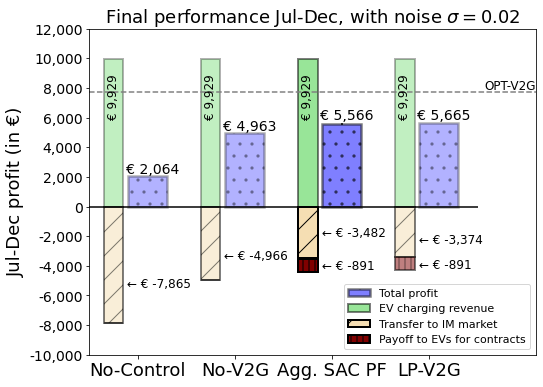

In [66]:
avg_asap = df_l6_ASAP[["transf", "client", "payoff", "total"]].mean()
min_asap = df_l6_ASAP[["transf", "client", "payoff", "total"]].min()
max_asap = df_l6_ASAP[["transf", "client", "payoff", "total"]].max()

avg_nov2g = pd.concat(df_nov2g_c)[["transf", "client", "payoff", "total"]].mean()
min_nov2g = pd.concat(df_nov2g_c)[["transf", "client", "payoff", "total"]].min()
max_nov2g = pd.concat(df_nov2g_c)[["transf", "client", "payoff", "total"]].max()

avg_optim = pd.concat(df_optim_c)[["transf", "client", "payoff", "total"]].mean()
min_optim = pd.concat(df_optim_c)[["transf", "client", "payoff", "total"]].min()
max_optim = pd.concat(df_optim_c)[["transf", "client", "payoff", "total"]].max()

df_res = pd.DataFrame([avg_asap, avg_nov2g, avg_optim], columns = ["transf", "client", "payoff", "total"])
df_min = pd.DataFrame([min_asap, min_nov2g, min_optim], columns = ["transf", "client", "payoff", "total"])
df_max = pd.DataFrame([max_asap, max_nov2g, max_optim], columns = ["transf", "client", "payoff", "total"])

rl_final_profit_ep = [df_lols[2][i][1]["total"].iloc[-1] for i in range(5)]
rl_final_client_ep = [df_lols[2][i][1]["client"].iloc[-1] for i in range(5)]
rl_final_transf_ep = [df_lols[2][i][1]["transf"].iloc[-1] for i in range(5)]
rl_final_payoff_ep = [df_lols[2][i][1]["payoff"].iloc[-1] for i in range(5)]

print(rl_final_transf_ep)
print(rl_final_profit_ep)
print(rl_final_payoff_ep)


fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(1,1,1)

barwidth = 0.2
fontsize = 14
x = np.array([0, 1, 3])

alpha1 = 0.3
alpha2 = 0.5
ax1.bar(x + 0.1,  df_res["total"],   color = "blue", edgecolor="black",      linewidth = 2.5, alpha=alpha1, width=barwidth*2,  hatch = ".", )
ax1.bar(x - 0.25, df_res["client"],  color = "limegreen", edgecolor="black", linewidth = 2,   alpha = alpha1, width=barwidth,               )
ax1.bar(x - 0.25, -df_res["transf"], color = "wheat", edgecolor="black",     linewidth = 2,   alpha = alpha2, width=barwidth, hatch="/",    )
ax1.bar(x - 0.25, -df_res["payoff"], color = "maroon", edgecolor="black",    linewidth = 2,   alpha= alpha2, width=barwidth, hatch = "||",  bottom = -df_res["transf"])

# RL
alpha1 = 0.5
alpha2 = 1
x_const = 2
ax1.bar(x_const+ 0.1,  np.max(rl_final_profit_ep), yerr=(np.max(rl_final_profit_ep)-np.min(rl_final_profit_ep))/2, color="blue",      label="Total profit",                edgecolor="black", linewidth=2.5, alpha=alpha1, width=barwidth*2, hatch = ".")
ax1.bar(x_const-0.25,  np.mean(rl_final_client_ep), yerr=(np.max(rl_final_client_ep)-np.min(rl_final_client_ep))/2, color="limegreen", label="EV charging revenue",         edgecolor="black", linewidth=2,   alpha=alpha1, width=barwidth)
ax1.bar(x_const-0.25, -np.min(rl_final_transf_ep), yerr=(np.max(rl_final_transf_ep)-np.min(rl_final_transf_ep))/2, color="wheat",     label="Transfer to IM market",       edgecolor="black", linewidth=2,   alpha=alpha2, width=barwidth, hatch="/")
ax1.bar(x_const-0.25, -np.mean(rl_final_payoff_ep), yerr=(np.max(rl_final_payoff_ep)-np.min(rl_final_payoff_ep))/2, color="maroon",    label="Payoff to EVs for contracts", edgecolor="black", linewidth=2,   alpha=alpha2, width=barwidth, hatch = "||", bottom = -np.mean(rl_final_transf_ep))

# Text
for (xi, row) in zip(x, df_res.itertuples()):
    # Profit
    ax1.text(xi + 0.15, row.total + 0, f"€ {row.total:,.0f}", ha="center", va="bottom", fontsize = fontsize-0)

    # EV Charging revenue
    ax1.text(xi-0.25, row.client - 1000, f"€ {row.client:,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)

    # Transfer to IM market
    ax1.text(xi-0.15, -4*row.transf/6, f" ← € -{row.transf:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

    # Payoff
    if row.payoff >0:
        ax1.text(xi-0.15, -row.transf-4*row.payoff/6, f" ← € -{row.payoff:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

ax1.text(x_const + 0.15, np.mean(rl_final_profit_ep) + 200, f"€ {np.max(rl_final_profit_ep):,.0f}", ha="center", va="bottom", fontsize = fontsize-0)
ax1.text(x_const - 0.25, np.mean(rl_final_client_ep) - 1000, f"€ {np.mean(rl_final_client_ep):,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)
ax1.text(x_const - 0.15, -np.mean(rl_final_transf_ep)/2, f" ← € -{np.min(rl_final_transf_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)
ax1.text(x_const - 0.15, -np.mean(rl_final_transf_ep)-np.mean(rl_final_payoff_ep)/2, f" ← € -{np.mean(rl_final_payoff_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

ax1.hlines(0, -0.5, 3.5, colors='k', linestyles='solid', linewidth=1.5)

ax1.set_xticks(np.arange(0, 4))
#ax1.set_xticklabels(["No-Control", "No-V2G", "LP-V2G", "Agg. SAC"], fontsize = fontsize + 4)
ax1.set_xticklabels(["No-Control", "No-V2G", "Agg. SAC PF", "LP-V2G"], fontsize = fontsize + 4)

ax1.set_xlim([-0.5, 4.1])
draw_baseLine(ax1, test_profit_optim, "OPT-V2G", xoffset =0.87, offset=200, fontsize = fontsize)

#y_ticks = ax1.get_yticks()
y_ticks = np.arange(-10_000, 13_000, 2_000)
ax1.set_yticks(y_ticks)
y_ticklabels = ["{:,.0f}".format(y) for y in y_ticks]
ax1.set_yticklabels(y_ticklabels, fontsize = fontsize)
ax1.set_ylabel("Jul-Dec profit (in €)", fontsize = fontsize + 4)

ax1.legend(ncol = 1, fontsize = fontsize-3, loc = "lower right", frameon = True)
ax1.set_title("Final performance Jul-Dec, with noise " + r"$\sigma = 0.02$", fontsize = fontsize + 4)


fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/img/baselines_profit_noisy2.pdf", dpi = 1200, bbox_inches='tight')

In [ ]:
def makeBaseBar(df_res, df_min, df_max, rl_final_profit_ep, rl_final_client_ep, rl_final_transf_ep, rl_final_payoff_ep, noise, subplot_label, ax, barwidth = 0.2, fontsize = 14, x= np.array([0, 1, 3]), alpha1=0.3, alpha2=0.5, x_const = 2):
    ax.bar(x + 0.1,  df_res["total"],   color = "blue", edgecolor="black",      linewidth = 2.5, alpha=alpha1, width=barwidth*2,  hatch = ".", )
    ax.bar(x - 0.25, df_res["client"],  color = "limegreen", edgecolor="black", linewidth = 2,   alpha = alpha1, width=barwidth,               )
    ax.bar(x - 0.25, -df_res["transf"], color = "wheat", edgecolor="black",     linewidth = 2,   alpha = alpha2, width=barwidth, hatch="/",    )
    ax.bar(x - 0.25, -df_res["payoff"], color = "maroon", edgecolor="black",    linewidth = 2,   alpha= alpha2, width=barwidth, hatch = "||",  bottom = -df_res["transf"])

    alpha1 = 0.5
    alpha2 = 1
    x_const = 2
    ax.bar(x_const+ 0.1,  np.max(rl_final_profit_ep), yerr=(np.max(rl_final_profit_ep)-np.min(rl_final_profit_ep))/2, color="blue",      label="Total profit",                edgecolor="black", linewidth=2.5, alpha=alpha1, width=barwidth*2, hatch = ".")
    ax.bar(x_const-0.25,  np.mean(rl_final_client_ep), yerr=(np.max(rl_final_client_ep)-np.min(rl_final_client_ep))/2, color="limegreen", label="EV charging revenue",         edgecolor="black", linewidth=2,   alpha=alpha1, width=barwidth)
    ax.bar(x_const-0.25, -np.min(rl_final_transf_ep), yerr=(np.max(rl_final_transf_ep)-np.min(rl_final_transf_ep))/2, color="wheat",     label="Transfer to IM market",       edgecolor="black", linewidth=2,   alpha=alpha2, width=barwidth, hatch="/")
    ax.bar(x_const-0.25, -np.mean(rl_final_payoff_ep), yerr=(np.max(rl_final_payoff_ep)-np.min(rl_final_payoff_ep))/2, color="maroon",    label="Payoff to EVs for contracts", edgecolor="black", linewidth=2,   alpha=alpha2, width=barwidth, hatch = "||", bottom = -np.mean(rl_final_transf_ep))

    # Text
    for (xi, row) in zip(x, df_res.itertuples()):
        # Profit
        ax.text(xi + 0.15, row.total + 0, f"€ {row.total:,.0f}", ha="center", va="bottom", fontsize = fontsize-0)

        # EV Charging revenue
        ax.text(xi-0.25, row.client - 1000, f"€ {row.client:,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)

        # Transfer to IM market
        ax.text(xi-0.15, -4*row.transf/6, f" ← € -{row.transf:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

        # Payoff
        if row.payoff >0:
            ax.text(xi-0.15, -row.transf-6*row.payoff/6, f" ← € -{row.payoff:,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

    ax.text(x_const + 0.15, np.mean(rl_final_profit_ep) + 200, f"€ {np.max(rl_final_profit_ep):,.0f}", ha="center", va="bottom", fontsize = fontsize-0)
    ax.text(x_const - 0.25, np.mean(rl_final_client_ep) - 1000, f"€ {np.mean(rl_final_client_ep):,.0f}", ha="center", va="top", rotation=90, fontsize = fontsize - 2)
    ax.text(x_const - 0.15, -np.mean(rl_final_transf_ep)/2, f" ← € -{np.min(rl_final_transf_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)
    ax.text(x_const - 0.15, -np.mean(rl_final_transf_ep)-np.mean(rl_final_payoff_ep)/2, f" ← € -{np.mean(rl_final_payoff_ep):,.0f}", ha="left", va = "center" , fontsize = fontsize - 2)

    ax.hlines(0, -0.5, 3.5, colors='k', linestyles='solid', linewidth=1.5)

    ax.set_xticks(np.arange(0, 4))
    #ax1.set_xticklabels(["No-Control", "No-V2G", "LP-V2G", "Agg. SAC"], fontsize = fontsize + 4)
    ax.set_xticklabels(["No-Control", "No-V2G", "Agg. SAC PF", "LP-V2G"], fontsize = fontsize + 4)

    ax.set_xlim([-0.5, 4.1])
    draw_baseLine(ax, test_profit_optim, "OPT-V2G", xoffset =0.87, offset=200, fontsize = fontsize)

    #y_ticks = ax1.get_yticks()
    y_ticks = np.arange(-10_000, 13_000, 4_000)
    ax.set_yticks(y_ticks)
    y_ticklabels = ["{:,.0f}".format(y) for y in y_ticks]
    ax.set_yticklabels(y_ticklabels, fontsize = fontsize)
    ax.set_ylabel("Jul-Dec profit (in €)", fontsize = fontsize + 2)

    ax.legend(ncol = 4, fontsize = fontsize-3, loc = "lower center", frameon = True)
    ax.set_title("Final performance Jul-Dec, with noise " + r"$\sigma =$" +f" {noise:.2f}", fontsize = fontsize + 4)
    ax.text(1.5, -14_000, subplot_label, fontsize = fontsize + 4, fontweight = "bold", family = "serif", ha = "center")

    return ax

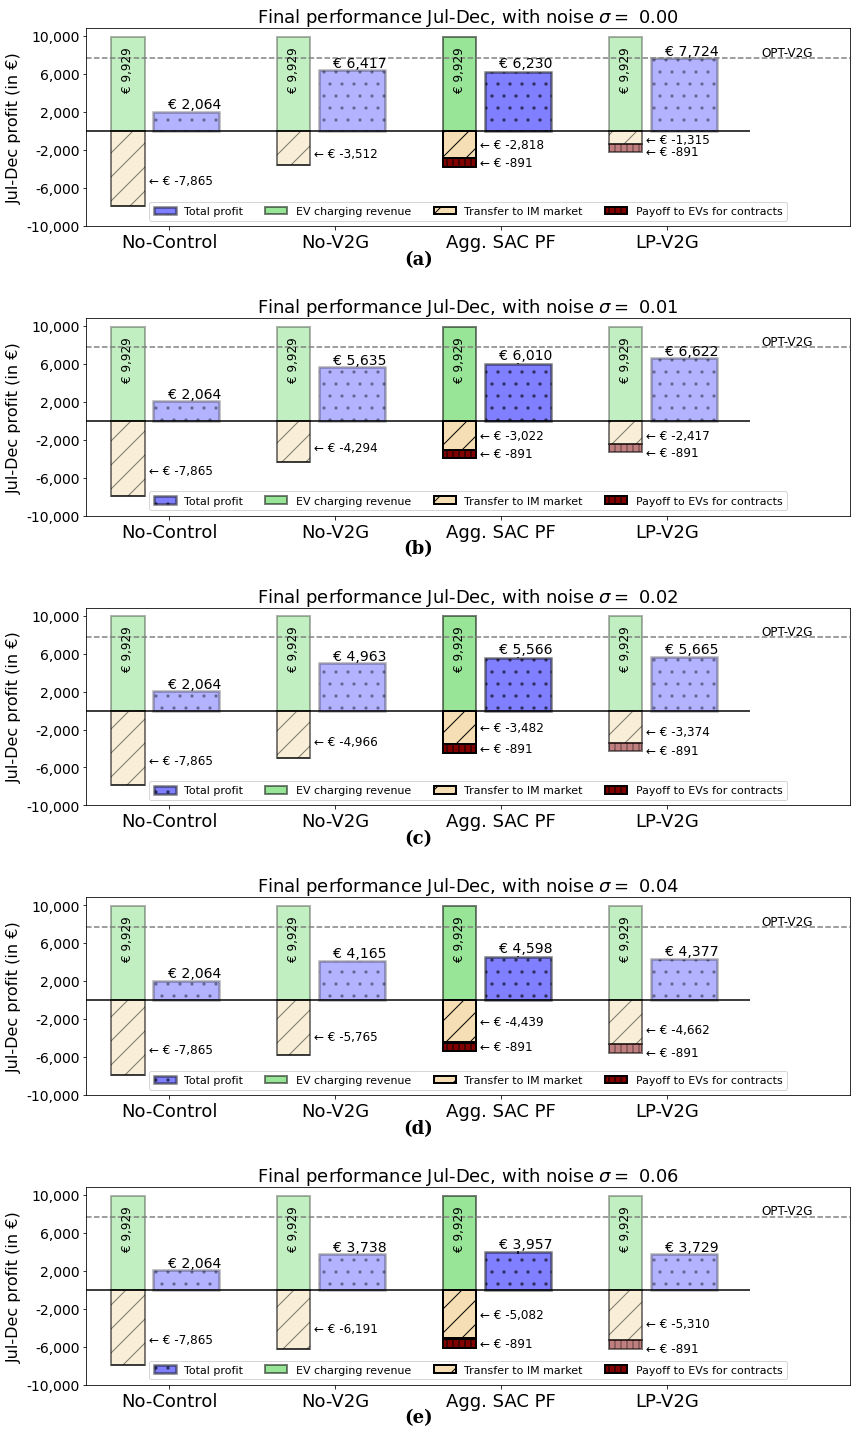

In [ ]:
# All noise levels
fig1, axs = plt.subplots(5, 1, figsize=(12, 20), )
nov2g_dfs = [df_nov2g_a, df_nov2g_b, df_nov2g_c, df_nov2g_d, df_nov2g_e]
optim_dfs = [df_optim_a, df_optim_b, df_optim_c, df_optim_d, df_optim_e]
subplot_labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]

noise_level = np.array([0.0, 0.01, 0.02, 0.04, 0.06])

for i, ax in enumerate(axs):
    avg_nov2g = pd.concat(nov2g_dfs[i])[["transf", "client", "payoff", "total"]].mean()
    min_nov2g = pd.concat(nov2g_dfs[i])[["transf", "client", "payoff", "total"]].min()
    max_nov2g = pd.concat(nov2g_dfs[i])[["transf", "client", "payoff", "total"]].max()

    avg_optim = pd.concat(optim_dfs[i])[["transf", "client", "payoff", "total"]].mean()
    min_optim = pd.concat(optim_dfs[i])[["transf", "client", "payoff", "total"]].min() 
    max_optim = pd.concat(optim_dfs[i])[["transf", "client", "payoff", "total"]].max()

    df_res = pd.DataFrame([avg_asap, avg_nov2g, avg_optim], columns = ["transf", "client", "payoff", "total"])
    df_min = pd.DataFrame([min_asap, min_nov2g, min_optim], columns = ["transf", "client", "payoff", "total"])
    df_max = pd.DataFrame([max_asap, max_nov2g, max_optim], columns = ["transf", "client", "payoff", "total"])

    rl_final_profit_ep = [df_lols[i][k][1]["total"].iloc[-1] for k in range(5)]
    rl_final_client_ep = [df_lols[i][k][1]["client"].iloc[-1] for k in range(5)]
    rl_final_transf_ep = [df_lols[i][k][1]["transf"].iloc[-1] for k in range(5)]
    rl_final_payoff_ep = [df_lols[i][k][1]["payoff"].iloc[-1] for k in range(5)]

    noise = noise_level[i]
    subplot_label = subplot_labels[i]

    makeBaseBar(df_res, df_min, df_max, rl_final_profit_ep, rl_final_client_ep, rl_final_transf_ep, rl_final_payoff_ep, noise, subplot_label, ax)

#fig1.tight_layout(h_pad = 5, w_pad = 5)
fig1.tight_layout(h_pad = 3)

%fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/baselines_profit_noisy_complete.pdf", dpi = 1200, bbox_inches='tight')
fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/img/baselines_profit_noisy_complete.png", dpi = 1200, bbox_inches='tight')


## 2+2 Month

In [ ]:
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_c --years 300 --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_d --years 300 --batch-size 512 --learning-starts 8 --alpha 0.03  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_e --years 300 --batch-size 512 --learning-starts 0 --alpha 0.01 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_f --years 300 --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_g --years 300 --batch-size 512 --learning-starts 12 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_h --years 300 --batch-size 512 --learning-starts 0 --alpha 0.03  --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_i --years 300 --batch-size 512 --learning-starts 0 --alpha 0.01 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_j --years 300 --batch-size 512 --learning-starts 0 --alpha 0.02 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
#nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_gen_G_k --years 300 --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &


dfs_Gf = load_rl_gen("month_sac_gen_G_f", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gg = load_rl_gen("month_sac_gen_G_g", 300, val = False) # --batch-size 512 --learning-starts 12 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gh = load_rl_gen("month_sac_gen_G_h", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.03  --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gi = load_rl_gen("month_sac_gen_G_i", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.01 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gj = load_rl_gen("month_sac_gen_G_j", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gk = load_rl_gen("month_sac_gen_G_k", 300, val = False) # --batch-size 512 --learning-starts 0 --alpha 0.02 --tau 0.001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &


(0.0, 2900.0)

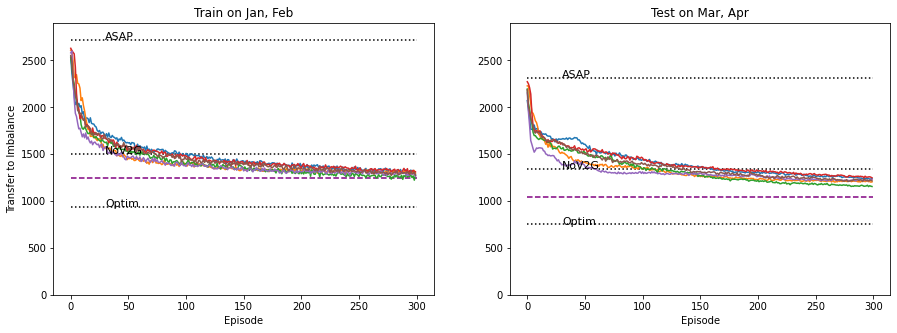

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Jan + Feb
train_asap = df_jan_ASAP["imbalance_bill"].sum() + df_feb_ASAP["imbalance_bill"].sum()
train_nov2g = df_jan_NoV2G["imbalance_bill"].sum() + df_feb_NoV2G["imbalance_bill"].sum()
train_optim = df_jan_Optim["imbalance_bill"].sum() + df_feb_Optim["imbalance_bill"].sum()
train_optim_payoff = df_jan_Optim["payoff"].sum() + df_feb_Optim["payoff"].sum()
ax1.hlines(train_nov2g - train_optim_payoff, 0, 300, label="To win profitablilty", color="purple", ls="--") 

# Mar + Apr
test_asap = df_mar_ASAP["imbalance_bill"].sum() + df_apr_ASAP["imbalance_bill"].sum()
test_nov2g = df_mar_NoV2G["imbalance_bill"].sum() + df_apr_NoV2G["imbalance_bill"].sum()
test_optim = df_mar_Optim["imbalance_bill"].sum() + df_apr_Optim["imbalance_bill"].sum()
test_optim_payoff = df_mar_Optim["payoff"].sum() + df_apr_Optim["payoff"].sum() 
ax2.hlines(test_nov2g - test_optim_payoff, 0, 300, label="To win profitablilty", color="purple", ls="--")

ax1 = draw_hlines(ax1, train_asap, train_nov2g, train_optim, x_max = 300)
ax2 = draw_hlines(ax2, test_asap, test_nov2g, test_optim, x_max = 300)

plot_rl_gen(ax1, ax2, None, dfs_Gf[0], None, dfs_Gf[1], label="dfs_Gf", val=False)
plot_rl_gen(ax1, ax2, None, dfs_Gg[0], None, dfs_Gg[1], label="dfs_Gg", val=False)
plot_rl_gen(ax1, ax2, None, dfs_Gh[0], None, dfs_Gh[1], label="dfs_Gh", val=False)
plot_rl_gen(ax1, ax2, None, dfs_Gi[0], None, dfs_Gi[1], label="dfs_Gi", val=False)
plot_rl_gen(ax1, ax2, None, dfs_Gj[0], None, dfs_Gj[1], label="dfs_Gj", val=False)
plot_rl_gen(ax1, ax2, None, dfs_Gk[0], None, dfs_Gk[1], label="dfs_Gk", val=False)


ax1.set_title("Train on Jan, Feb")
ax2.set_title("Test on Mar, Apr")

ax1.set_ylabel("Transfer to Imbalance")
ax1.set_ylim([0, 2900])
ax2.set_ylim([0, 2900])

#plot_rl_gen(ax1, ax2b, ax2, dfs_Ia[0], dfs_Ia[1], dfs_Ia[2], label="Default parameters")

## Big gen

In [ ]:
dfs_Ia = load_rl_gen("month_sac_gen_I_a", 500) # Vanilla
dfs_Ib = load_rl_gen("month_sac_gen_I_b", 500) # --disagg LL
dfs_Ic = load_rl_gen("month_sac_gen_I_c", 500) # --batch-size 128
dfs_Id = load_rl_gen("month_sac_gen_I_d", 500) # --batch-size 512
dfs_Ie = load_rl_gen("month_sac_gen_I_e", 500) # --learning-starts 0 
dfs_If = load_rl_gen("month_sac_gen_I_f", 500) # --learning-starts 72
dfs_Ig = load_rl_gen("month_sac_gen_I_g", 500) # --gamma 1.00
dfs_Ih = load_rl_gen("month_sac_gen_I_h", 500) # --gamma 0.95
dfs_Ii = load_rl_gen("month_sac_gen_I_i", 500) # --gamma 0.90
dfs_Ij = load_rl_gen("month_sac_gen_I_j", 500) # --tau 0.1
dfs_Ik = load_rl_gen("month_sac_gen_I_k", 500) # --tau 0.01
dfs_Il = load_rl_gen("month_sac_gen_I_l", 500) # --tau 0.001
dfs_Im = load_rl_gen("month_sac_gen_I_m", 500) # --tau 0.0001
dfs_In = load_rl_gen("month_sac_gen_I_n", 500) # --alpha 0.1
dfs_Io = load_rl_gen("month_sac_gen_I_o", 500) # --alpha 0.3
dfs_Ip = load_rl_gen("month_sac_gen_I_p", 500) # --alpha 0.4
dfs_Iq = load_rl_gen("month_sac_gen_I_q", 500) # --alpha 0.5
dfs_Ir = load_rl_gen("month_sac_gen_I_r", 500) # --rng-test True
dfs_Is = load_rl_gen("month_sac_gen_I_s", 500) # --price-noise 1
dfs_It = load_rl_gen("month_sac_gen_I_t", 500) # --rng-test True --price-noise 1 
dfs_Iu = load_rl_gen("month_sac_gen_I_u", 500) # --price-noise 3
dfs_Iv = load_rl_gen("month_sac_gen_I_v", 500) # --rng-test True --price-noise 3  
dfs_Iw = load_rl_gen("month_sac_gen_I_w", 500) # --price-noise 10
dfs_Ix = load_rl_gen("month_sac_gen_I_x", 500) # --rng-test True --price-noise 10 
dfs_Iy = load_rl_gen("month_sac_gen_I_y", 500) # --rng-test True --price-noise 3 --tau 0.01 
dfs_Iz = load_rl_gen("month_sac_gen_I_z", 500) # --rng-test True --price-noise 3 --alpha 0.4
dfs_Ja = load_rl_gen("month_sac_gen_J_a", 500) # --policy-lr 0.0001 
dfs_Jb = load_rl_gen("month_sac_gen_J_b", 500) # --policy-lr 0.001 
dfs_Jc = load_rl_gen("month_sac_gen_J_c", 500) # --q-lr 0.0003 
dfs_Jd = load_rl_gen("month_sac_gen_J_d", 500) # --q-lr 0.003 
dfs_Je = load_rl_gen("month_sac_gen_J_e", 500) # --policy-frequency 1 
dfs_Jf = load_rl_gen("month_sac_gen_J_f", 500) # --policy-frequency 4 
dfs_Jg = load_rl_gen("month_sac_gen_J_g", 500) # --target-network-frequency 2                             
dfs_Jh = load_rl_gen("month_sac_gen_J_h", 500) # --batch-size 1024 
dfs_Ji = load_rl_gen("month_sac_gen_J_i", 500) # --batch-size 2048 
dfs_Jj = load_rl_gen("month_sac_gen_J_j", 500) # --alpha 0.05 
dfs_Jk = load_rl_gen("month_sac_gen_J_k", 500) # --alpha 0.03 
dfs_Jl = load_rl_gen("month_sac_gen_J_l", 500) # --alpha 0.01 
dfs_Jm = load_rl_gen("month_sac_gen_J_m", 500) # --alpha 0.003 
dfs_Jn = load_rl_gen("month_sac_gen_J_n", 500) # --alpha 0.001 
dfs_Jo = load_rl_gen("month_sac_gen_J_o", 500) # --policy-frequency 8 
dfs_Jp = load_rl_gen("month_sac_gen_J_p", 500) # --policy-frequency 16 
dfs_Jq = load_rl_gen("month_sac_gen_J_q", 500) # --target-network-frequency 4 
dfs_Jr = load_rl_gen("month_sac_gen_J_r", 500) # --target-network-frequency 8 
dfs_Js = load_rl_gen("month_sac_gen_J_s", 500) # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2
dfs_Jt = load_rl_gen("month_sac_gen_J_t", 500) # --batch-size 512 --learning-starts 0 
dfs_Ju = load_rl_gen("month_sac_gen_J_u", 500) # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 
dfs_Jv = load_rl_gen("month_sac_gen_J_v", 500) # --batch-size 512 --learning-starts 0 --policy-frequency 4 --target-network-frequency 2 
dfs_Jw = load_rl_gen("month_sac_gen_J_w", 500) # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4                                              

dfs_Jx = load_rl_gen("month_sac_gen_J_x", 300) # -- Vanilla 2
dfs_Jy = load_rl_gen("month_sac_gen_J_y", 300) # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Jz = load_rl_gen("month_sac_gen_J_z", 300) # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Ga = load_rl_gen("month_sac_gen_G_a", 300) # --batch-size 512 --learning-starts 0 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &
dfs_Gb = load_rl_gen("month_sac_gen_G_b", 300) # --batch-size 512 --learning-starts 8 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 --general True &

dfs_gen = [ dfs_Ia, dfs_Ib, dfs_Ic, dfs_Id, dfs_Ie, dfs_If, dfs_Ig, dfs_Ih, dfs_Ii, dfs_Ij, dfs_Ik, dfs_Il, dfs_Im, dfs_In, dfs_Io, dfs_Ip, dfs_Iq, dfs_Ir,
dfs_Is, dfs_It, dfs_Iu, dfs_Iv, dfs_Iw, dfs_Ix, dfs_Iy, dfs_Iz, dfs_Ja, dfs_Jb, dfs_Jc, dfs_Jd, dfs_Je, dfs_Jf, dfs_Jg, dfs_Jh, dfs_Ji, dfs_Jj, dfs_Jk, dfs_Jl,
dfs_Jm, dfs_Jn, dfs_Jo, dfs_Jp, dfs_Jq, dfs_Jr, dfs_Js, dfs_Jt, dfs_Ju, dfs_Jv, dfs_Jw, dfs_Jx, dfs_Jy, dfs_Jz, dfs_Ga, dfs_Gb,]


names = [ "I_a", "I_b", "I_c", "I_d", "I_e", "I_f", "I_g", "I_h", "I_i", "I_j", "I_k", "I_l", "I_m", "I_n", "I_o", "I_p", "I_q", "I_r", "I_s", "I_t", "I_u",
"I_v", "I_w", "I_x", "I_y", "I_z", "J_a", "J_b", "J_c", "J_d", "J_e", "J_f", "J_g", "J_h", "J_i", "J_j", "J_k", "J_l", "J_m", "J_n", "J_o", "J_p", "J_q",
"J_r", "J_s", "J_t", "J_u", "J_v", "J_w", "J_x", "J_y", "J_z", "G_a", "G_b", ]






In [ ]:
data = []
for i, df in enumerate(dfs_gen):
    data.append([names[i], dfs_gen[i][2]["transf"].min()])

df_gen = pd.DataFrame(data, columns=["name", "min_transf"])
df_gen.sort_values(by = ["min_transf"], ascending=True).head()


,name,min_transf
44,J_s,563.381021
46,J_u,575.300503
48,J_w,576.996827
51,J_z,580.700782
52,G_a,606.524336


In [ ]:
df_jan_ASAP.head()

,ts,arr_e_req,client_bill,assigned_type,realized_type,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
0,166559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.00000,0.0,0.000000,NaN
1,166560.0,10.78,0.68992,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.1375,0.63811,1.0,0.233333,0.0
2,166561.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.200000,0.0
3,166562.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.166667,0.0
4,166563.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,1.0,0.133333,0.0


Text(0.5, 1.0, 'Val Mar 2019')

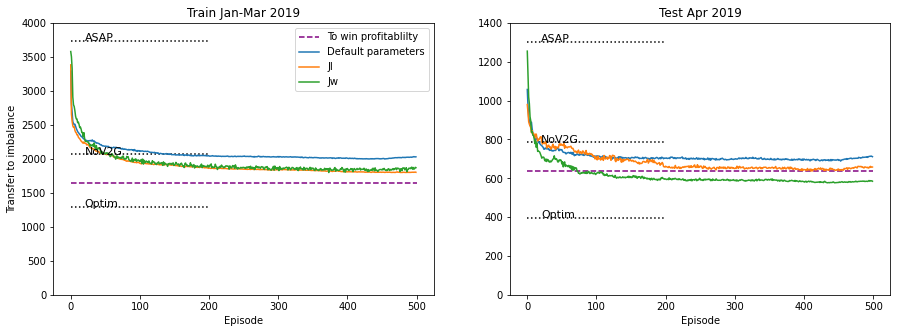

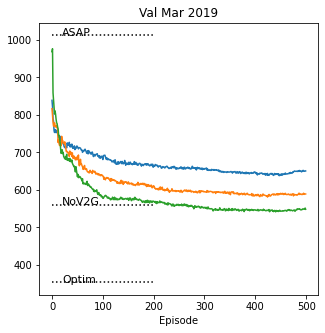

In [ ]:

fig1, (ax1, ax2) =  plt.subplots(1,2, figsize=(15,5)) #, sharey = True)
fig2, ax2b = plt.subplots(1,1, figsize=(5,5))

train_asap = df_jan_ASAP["imbalance_bill"].sum() + df_feb_ASAP["imbalance_bill"].sum() + df_mar_ASAP["imbalance_bill"].sum()
train_nov2g = df_jan_NoV2G["imbalance_bill"].sum() + df_feb_NoV2G["imbalance_bill"].sum() + df_mar_NoV2G["imbalance_bill"].sum()
train_optim = df_jan_Optim["imbalance_bill"].sum() + df_feb_Optim["imbalance_bill"].sum() + df_mar_Optim["imbalance_bill"].sum()
train_payoff = df_jan_Optim["payoff"].sum() + df_feb_Optim["payoff"].sum() + df_mar_Optim["payoff"].sum()

ax1 = draw_hlines(ax1, train_asap, train_nov2g, train_optim, x_max = 200)
ax2b = draw_hlines(ax2b, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), x_max = 200)
ax2 = draw_hlines(ax2, df_apr_ASAP["imbalance_bill"].sum(), df_apr_NoV2G["imbalance_bill"].sum(), df_apr_Optim["imbalance_bill"].sum(), x_max = 200)
ax2.hlines(df_apr_NoV2G["imbalance_bill"].sum()-148, 0, 500, label="To win profitablilty", color="purple", ls="--")
ax1.hlines(train_nov2g-train_payoff, 0, 500, label="To win profitablilty", color="purple", ls="--")

plot_rl_gen(ax1, ax2b, ax2, dfs_Ia[0], dfs_Ia[1], dfs_Ia[2], label="Default parameters")
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ib[0], dfs_Ib[1], dfs_Ib[2], label="Ib") # --disagg LL
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ic[0], dfs_Ic[1], dfs_Ic[2], label="Ic") # --batch-size 128
#plot_rl_gen(ax1, ax2b, ax2, dfs_Id[0], dfs_Id[1], dfs_Id[2], label="Id") # --batch-size 512
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ie[0], dfs_Ie[1], dfs_Ie[2], label="Ie") # --learning-starts 0 
#plot_rl_gen(ax1, ax2b, ax2, dfs_If[0], dfs_If[1], dfs_If[2], label="If") # --learning-starts 72
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ig[0], dfs_Ig[1], dfs_Ig[2], label="Ig") # --gamma 1.00
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ih[0], dfs_Ih[1], dfs_Ih[2], label="Ih") # --gamma 0.95
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ii[0], dfs_Ii[1], dfs_Ii[2], label="Ii") # --gamma 0.90
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ij[0], dfs_Ij[1], dfs_Ij[2], label="Ij") # --tau 0.1
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ik[0], dfs_Ik[1], dfs_Ik[2], label="Ik") # --tau 0.01
#plot_rl_gen(ax1, ax2b, ax2, dfs_Il[0], dfs_Il[1], dfs_Il[2], label="Il") # --tau 0.001
#plot_rl_gen(ax1, ax2b, ax2, dfs_Im[0], dfs_Im[1], dfs_Im[2], label="Im") # --tau 0.0001
#plot_rl_gen(ax1, ax2b, ax2, dfs_In[0], dfs_In[1], dfs_In[2], label="In") # --alpha 0.1
#plot_rl_gen(ax1, ax2b, ax2, dfs_Io[0], dfs_Io[1], dfs_Io[2], label="Io") # --alpha 0.3
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ip[0], dfs_Ip[1], dfs_Ip[2], label="Ip") # --alpha 0.4
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iq[0], dfs_Iq[1], dfs_Iq[2], label="Iq") # --alpha 0.5
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ir[0], dfs_Ir[1], dfs_Ir[2], label="Ir") # --rng-test True
#plot_rl_gen(ax1, ax2b, ax2, dfs_Is[0], dfs_Is[1], dfs_Is[2], label="Is") # --price-noise 1
#plot_rl_gen(ax1, ax2b, ax2, dfs_It[0], dfs_It[1], dfs_It[2], label="It") # --rng-test True --price-noise 1 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iu[0], dfs_Iu[1], dfs_Iu[2], label="Iu") # --price-noise 3
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iv[0], dfs_Iv[1], dfs_Iv[2], label="Iv") # --rng-test True --price-noise 3  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iw[0], dfs_Iw[1], dfs_Iw[2], label="Iw") # --price-noise 10
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ix[0], dfs_Ix[1], dfs_Ix[2], label="Ix") # --rng-test True --price-noise 10 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iy[0], dfs_Iy[1], dfs_Iy[2], label="Iy") # --rng-test True --price-noise 3 --tau 0.01 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Iz[0], dfs_Iz[1], dfs_Iz[2], label="Iz") # --rng-test True --price-noise 3 --alpha 0.4
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ja[0], dfs_Ja[1], dfs_Ja[2], label="Ja") # --policy-lr 0.0001 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jb[0], dfs_Jb[1], dfs_Jb[2], label="Jb") # --policy-lr 0.001 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jc[0], dfs_Jc[1], dfs_Jc[2], label="Jc") # --q-lr 0.0003 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jd[0], dfs_Jd[1], dfs_Jd[2], label="Jd") # --q-lr 0.003 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Je[0], dfs_Je[1], dfs_Je[2], label="Je") # --policy-frequency 1 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jf[0], dfs_Jf[1], dfs_Jf[2], label="Jf") # --policy-frequency 4 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jg[0], dfs_Jg[1], dfs_Jg[2], label="Jg") # --target-network-frequency 2                            

#plot_rl_gen(ax1, ax2b, ax2, dfs_Jh[0], dfs_Jh[1], dfs_Jh[2], label="Jh") # --batch-size 1024                                                                                                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ji[0], dfs_Ji[1], dfs_Ji[2], label="Ji") # --batch-size 2048                                                                                                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jj[0], dfs_Jj[1], dfs_Jj[2], label="Jj") # --alpha 0.05                                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jk[0], dfs_Jk[1], dfs_Jk[2], label="Jk") # --alpha 0.03                                                                                                       
plot_rl_gen(ax1, ax2b, ax2, dfs_Jl[0], dfs_Jl[1], dfs_Jl[2], label="Jl") # --alpha 0.01                                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jm[0], dfs_Jm[1], dfs_Jm[2], label="Jm") # --alpha 0.003                                                                                                      
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jn[0], dfs_Jn[1], dfs_Jn[2], label="Jn") # --alpha 0.001                                                                                                      
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jo[0], dfs_Jo[1], dfs_Jo[2], label="Jo") # --policy-frequency 8                                                                                               
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jp[0], dfs_Jp[1], dfs_Jp[2], label="Jp") # --policy-frequency 16                                                                                              
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jq[0], dfs_Jq[1], dfs_Jq[2], label="Jq") # --target-network-frequency 4                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jr[0], dfs_Jr[1], dfs_Jr[2], label="Jr") # --target-network-frequency 8                                                                                       
#plot_rl_gen(ax1, ax2b, ax2, dfs_Js[0], dfs_Js[1], dfs_Js[2], label="Js") # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jt[0], dfs_Jt[1], dfs_Jt[2], label="Jt") # --batch-size 512 --learning-starts 0                                                                               
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ju[0], dfs_Ju[1], dfs_Ju[2], label="Ju") # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2                  
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jv[0], dfs_Jv[1], dfs_Jv[2], label="Jv") # --batch-size 512 --learning-starts 0 --policy-frequency 4 --target-network-frequency 2                             
plot_rl_gen(ax1, ax2b, ax2, dfs_Jw[0], dfs_Jw[1], dfs_Jw[2], label="Jw") # --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4                                               


#plot_rl_gen(ax1, ax2b, ax2, dfs_Jx[0], dfs_Jx[1], dfs_Jx[2], label="Jx") # -- Vanilla 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jy[0], dfs_Jy[1], dfs_Jy[2], label="Jy") # --batch-size 512 --learning-starts 0 --alpha 0.1 --rng-test True --policy-frequency 4 --target-network-frequency 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Jz[0], dfs_Jz[1], dfs_Jz[2], label="Jz") # --batch-size 512 --learning-starts 0 --alpha 0.03 --rng-test True --policy-frequency 4 --target-network-frequency 2
#plot_rl_gen(ax1, ax2b, ax2, dfs_Ga[0], dfs_Ga[1], dfs_Ga[2], label="Ga") # --batch-size 512 --learning-starts 0 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 
#plot_rl_gen(ax1, ax2b, ax2, dfs_Gb[0], dfs_Gb[1], dfs_Gb[2], label="Gb") # --batch-size 512 --learning-starts 8 --alpha 0.1  --tau 0.0001 --rng-test True --policy-frequency 4 --target-network-frequency 2 

ax1.set_title("Train Jan-Mar 2019")
ax2.set_title("Test Apr 2019")
ax1.set_ylim([0, 4000])
ax2.set_ylim([0, 1400])
ax1.legend()
ax1.set_ylabel("Transfer to imbalance")

ax2b.set_title("Val Mar 2019")

Text(0.5, 0.98, 'Month SAC')

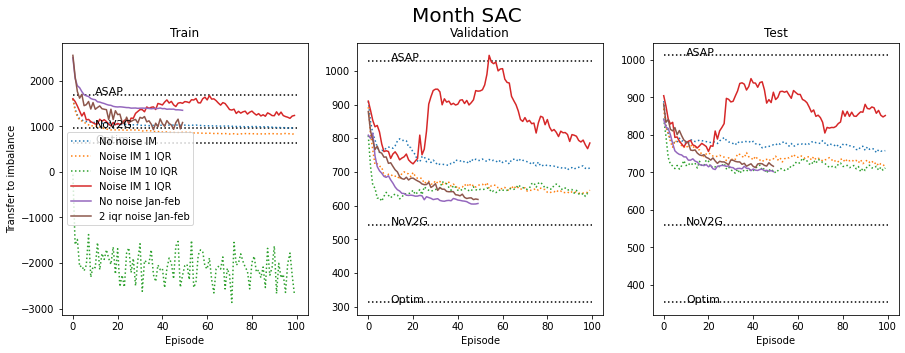

In [ ]:
# Month

df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_gen_a", 100)
df_m2_train, df_m2_val, df_m2_test = load_rl_gen("month_sac_gen_b", 100) # Questionable procedure for noise
df_m3_train, df_m3_val, df_m3_test = load_rl_gen("month_sac_gen_c", 100) # Noise 10 IQR, good proc for noise?
df_m4_train, df_m4_val, df_m4_test = load_rl_gen("month_sac_gen_d", 100) # Noise 1 IQR, good proc for noise
df_m5_train, df_m5_val, df_m5_test = load_rl_gen("month_sac_gen_e", 50) # 2 monrths train, no noise 
df_m6_train, df_m6_val, df_m6_test = load_rl_gen("month_sac_gen_f", 50) # 2 monrths train, 2iqr noise 

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)


ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), x_max = 100)
ax2 = draw_hlines(ax2, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), x_max = 100)
ax3 = draw_hlines(ax3, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), x_max = 100)

ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m_train, df_m_val, df_m_test, label="No noise IM", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m2_train, df_m2_val, df_m2_test, label="Noise IM 1 IQR", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m3_train, df_m3_val, df_m3_test, label="Noise IM 10 IQR", ls=":")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m4_train, df_m4_val, df_m4_test, label="Noise IM 1 IQR")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m5_train, df_m5_val, df_m5_test, label="No noise Jan-feb")
ax1, ax2, ax3 = plot_rl_gen(ax1, ax2, ax3, df_m6_train, df_m6_val, df_m6_test, label="2 iqr noise Jan-feb")

ax1.set_title("Train")
ax2.set_title("Validation")
ax3.set_title("Test")

ax1.set_ylabel("Transfer to imbalance")
ax1.legend()
fig1.suptitle("Month SAC", fontsize = 20)

Text(0.5, 0.98, 'SAC')

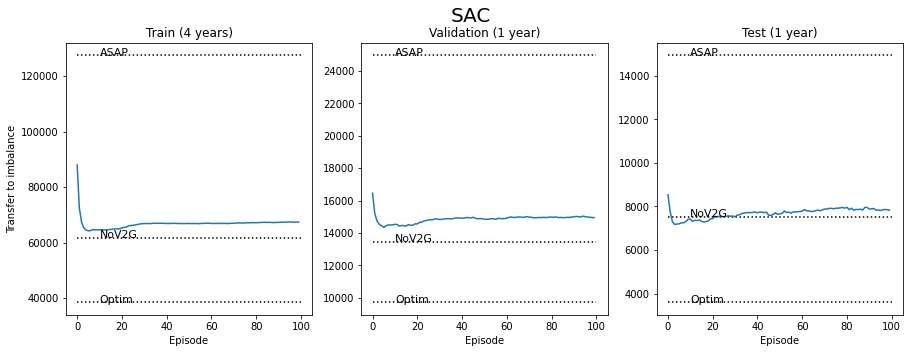

In [ ]:
# Year
df_train, df_val, df_test = load_rl_gen("sac_c", 100)
#df_train, df_val, df_test = load_rl_gen("sac_d_c", 6)

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, asap_train["imbalance_bill"].sum(), nov2g_train["imbalance_bill"].sum(), optim_train["imbalance_bill"].sum())
ax2 = draw_hlines(ax2, asap_val["imbalance_bill"].sum(), nov2g_val["imbalance_bill"].sum(), optim_val["imbalance_bill"].sum())
ax3 = draw_hlines(ax3, asap_test["imbalance_bill"].sum(), nov2g_test["imbalance_bill"].sum(), optim_test["imbalance_bill"].sum())

ax1.plot(df_train["transf"])
ax2.plot(  df_val["transf"])
ax3.plot( df_test["transf"])

ax1.set_title("Train (4 years)")
ax2.set_title("Validation (1 year)")
ax3.set_title("Test (1 year)")

ax1.set_ylabel("Transfer to imbalance")

fig1.suptitle("SAC", fontsize = 20)

## Buffer size

Text(0.5, 1.0, 'Month SAC Buffersize')

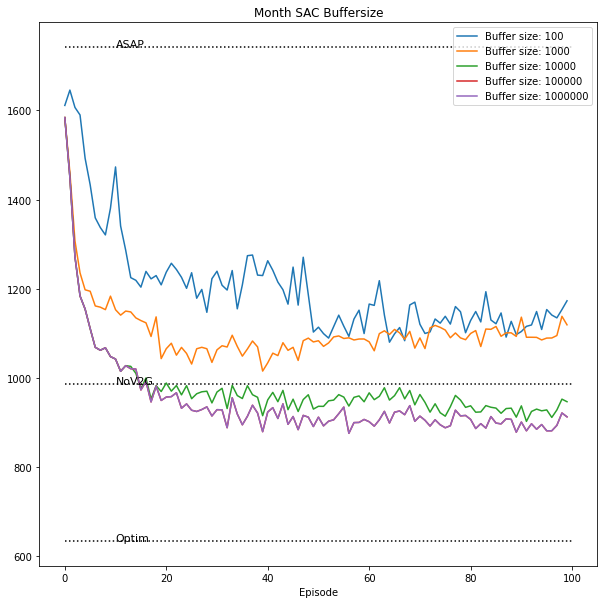

In [ ]:
month_a_str = ["./../ExpLogs/summ_month_sac_IX_a_{}.csv".format(i) for i in range(100)]   
month_b_str = ["./../ExpLogs/summ_month_sac_IX_b_{}.csv".format(i) for i in range(100)]   
month_c_str = ["./../ExpLogs/summ_month_sac_IX_c_{}.csv".format(i) for i in range(100)]   
month_d_str = ["./../ExpLogs/summ_month_sac_IX_d_{}.csv".format(i) for i in range(100)]   
month_e_str = ["./../ExpLogs/summ_month_sac_IX_e_{}.csv".format(i) for i in range(100)]   

df_month_a = pd.concat([pd.read_csv(i) for i in month_a_str], axis=0).reset_index(drop=True)
df_month_b = pd.concat([pd.read_csv(i) for i in month_b_str], axis=0).reset_index(drop=True)
df_month_c = pd.concat([pd.read_csv(i) for i in month_c_str], axis=0).reset_index(drop=True)
df_month_d = pd.concat([pd.read_csv(i) for i in month_d_str], axis=0).reset_index(drop=True)
df_month_e = pd.concat([pd.read_csv(i) for i in month_e_str], axis=0).reset_index(drop=True)

fig1, (ax1) = plt.subplots(1,1, figsize=(10,10))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum())
ax1.plot(df_month_a["transf"], label = "Buffer size: 100")
ax1.plot(df_month_b["transf"], label = "Buffer size: 1000")
ax1.plot(df_month_c["transf"], label = "Buffer size: 10000")
ax1.plot(df_month_d["transf"], label = "Buffer size: 100000")
ax1.plot(df_month_e["transf"], label = "Buffer size: 1000000")

ax1.legend()

ax1.set_title("Month SAC Buffersize")

#/summ_month_sac_IX_e_94.csv

In [ ]:
# Notes
df_train, df_val, df_test = load_rl_gen("month_sac_d", 3)
display(df_train.head())
display(df_val.head())
display(df_test.head())

,name,transf,client,payoff,total
0,train_month_sac_d_0,1583.547583,1469.562214,135.214407,-249.199776
1,train_month_sac_d_1,1290.695682,1469.562214,135.214407,43.652126
2,train_month_sac_d_2,1198.703552,1469.562214,135.214407,135.644256


,name,transf,client,payoff,total
0,val_month_sac_d_0,2278.333267,2277.450961,145.307986,-146.190293
1,val_month_sac_d_1,2056.834365,2277.450961,145.307986,75.308609
2,val_month_sac_d_2,2020.477284,2277.450961,145.307986,111.665690


,name,transf,client,payoff,total
0,test_month_sac_d_0,1736.844074,2289.492688,157.201251,395.447363
1,test_month_sac_d_1,1574.938689,2289.492688,157.201251,557.352748
2,test_month_sac_d_2,1488.377481,2289.492688,157.201251,643.913956


## Monthly optim

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
agents = ["ASAP", "NoV2G", "Optim"]
l_summ_month = []
for i in range(12):
    # Concatate pandas dataframes
    l_summ_agents = []
    for agent in agents:
        df_month = pd.read_csv(f"./../ExpLogs/summ_{months[i].lower()}_{agent}.csv")
        df_month = df_month[["transf", "client", "payoff", "total"]]
        df_month = df_month.rename(columns={"transf": f"transf_{agent.lower()}",
                                            "client": f"client_{agent.lower()}",
                                            "payoff": f"payoff_{agent.lower()}",
                                            "total":  f"total_{agent.lower()}",})
        l_summ_agents.append(df_month)
    df_month_agents = pd.concat(l_summ_agents, axis=1)
    df_month_agents["month"] = months[i]
    df_month_agents["idx_month"] = i
    l_summ_month.append(df_month_agents)

df_year = pd.concat(l_summ_month, axis=0).reset_index(drop=True)
df_year


,transf_asap,client_asap,payoff_asap,total_asap,transf_nov2g,client_nov2g,payoff_nov2g,total_nov2g,transf_optim,client_optim,payoff_optim,total_optim,month,idx_month
0,1689.668779,1469.562214,0,-220.106564,963.661917,1469.562214,0,505.900298,627.726666,1469.562214,138.628529,703.207020,Jan,0
1,1029.567958,1349.047258,0,319.479300,542.264931,1349.047258,0,806.782327,312.847479,1349.047258,120.388091,915.811688,Feb,1
2,1012.411478,1488.309120,0,475.897642,560.908452,1488.309120,0,927.400668,353.033254,1488.309120,155.962898,979.312968,Mar,2
3,1302.818178,1468.334912,0,165.516734,784.815804,1468.334912,0,683.519108,397.395422,1468.334912,148.508029,922.431461,Apr,3
4,1024.363474,1329.610918,0,305.247445,643.267146,1329.610918,0,686.343772,448.287693,1329.610918,129.108311,752.214915,May,4
5,1013.169713,1266.986394,0,253.816681,515.117967,1266.986394,0,751.868427,137.989874,1266.986394,144.774567,984.221952,Jun,5
6,834.412482,1233.971674,0,399.559192,479.295076,1233.971674,0,754.676598,229.983578,1233.971674,130.454938,873.533158,Jul,6
7,814.571575,1006.899328,0,192.327753,466.518536,1006.899328,0,540.380792,239.382334,1006.899328,88.347085,679.169908,Aug,7
8,1076.944849,1488.591987,0,411.647138,419.230270,1488.591987,0,1069.361718,17.915567,1488.591987,150.614229,1320.062192,Sep,8
9,1425.500113,1835.451533,0,409.951420,559.877027,1835.451533,0,1275.574506,27.691848,1835.451533,187.401715,1620.357970,Oct,9


Text(0, 0.5, 'Total profit')

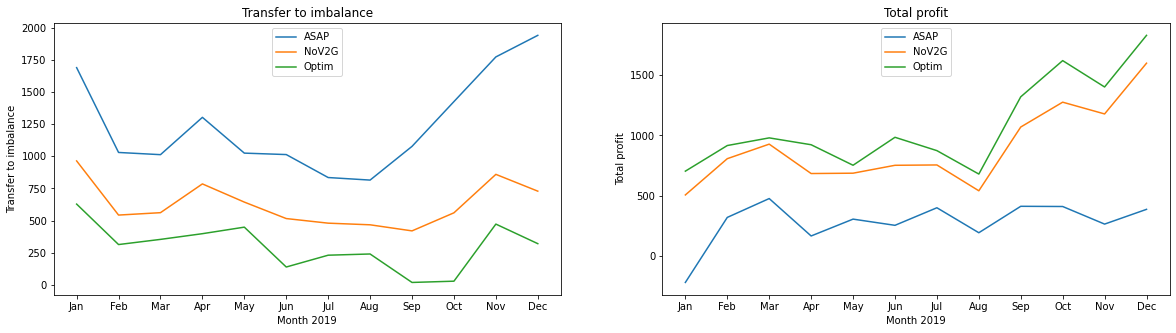

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(df_year["transf_asap"], label = "ASAP")
ax1.plot(df_year["transf_nov2g"], label = "NoV2G")
ax1.plot(df_year["transf_optim"], label = "Optim")

ax2.plot(df_year["total_asap"], label = "ASAP")
ax2.plot(df_year["total_nov2g"], label = "NoV2G")
ax2.plot(df_year["total_optim"], label = "Optim")

ax1.set_xticks(df_year["idx_month"])
ax1.set_xticklabels(df_year["month"])
ax2.set_xticks(df_year["idx_month"])
ax2.set_xticklabels(df_year["month"])
ax1.legend(loc = "upper center")
ax2.legend(loc = "upper center")

ax1.set_title("Transfer to imbalance")
ax2.set_title("Total profit")
ax1.set_xlabel("Month 2019")
ax2.set_xlabel("Month 2019")
ax1.set_ylabel("Transfer to imbalance")
ax2.set_ylabel("Total profit")

#ax1.set_ylim(0, 1.1*df_year["transf_asap"].max())